# Housing Prices: Exploratory Data Analysis (EDA)

**Date:** 2025-10-28<br>
**Author:** *Luis Renteria Lezano*
## Executive Summary
- **Goal:** Understand the significant predictors of Sale Price to prepare clean and structured data that is immediately useful for building baseline and advanced regression models.
- **Source:** This analysis uses the Housing Prices dataset from the Kaggle prediction competition [Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/competitions/home-data-for-ml-course/overview)
- **Data:** `../data/raw/train.csv`.

## 0. Reproducibility & Environment Setup
- Pin versions in `../requirements.txt`.
- Keep raw data immutable `../data/raw/`.
- Write cleaned/derived data to `../data/interim/`.
- Export final tables to `../reports/tables/` and figures to `../reports/figures/EDA`.

In [159]:
#  Imports & basic setup
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reproducibility
SEED = 42
np.random.seed(SEED)

# Paths
DATA_RAW = Path("../data/raw")
DATA_PROCESSED = Path("../data/interim")
REPORTS_TABLES = Path("../reports/tables")
REPORTS_FIGURES = Path("../reports/figures/EDA")

# Plot themes and palettes defaults
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["axes.facecolor"] = "#fafafa"
plt.rcParams['grid.alpha'] = 0.3
sns.set_theme(style='whitegrid', palette='colorblind', context='notebook')

print("Folder statuses:")
for d in [DATA_RAW, DATA_PROCESSED, REPORTS_TABLES, REPORTS_FIGURES]:
    print('\t', d.resolve(), "- Ready" if d.exists() else "- Missing")
print("> Environment setup completed.")

Folder statuses:
	 C:\Users\Usuario\Desktop\github-repos\house-prices-prediction\data\raw - Ready
	 C:\Users\Usuario\Desktop\github-repos\house-prices-prediction\data\interim - Ready
	 C:\Users\Usuario\Desktop\github-repos\house-prices-prediction\reports\tables - Ready
	 C:\Users\Usuario\Desktop\github-repos\house-prices-prediction\reports\figures\EDA - Ready
> Environment setup completed.


## 1. Introduction
This notebook performs an EDA of the Ames Housing dataset (Kaggle) in order to understand price patterns `SalePrice`, data quality and key relationships between variables.

**Columns available:**  
- **Target**: `SalePrice` (USD).    
- **Features**: `MSSubClass`, `MSZoning`, `LotFrontage`, `LotArea`, `Street`, `Alley`, `LotShape`, `LandContour`, `Utilities`, `LotConfig`, `LandSlope`, `Neighborhood`, `Condition1`, `Condition2`, `BldgType`, `HouseStyle`, `OverallQual`, `OverallCond`, `YearBuilt`, `YearRemodAdd`, `RoofStyle`, `RoofMatl`, `Exterior1st`, `Exterior2nd`, `MasVnrType`, `MasVnrArea`, `ExterQual`, `ExterCond`, `Foundation`, `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinSF1`, `BsmtFinType2`, `BsmtFinSF2`, `BsmtUnfSF`, `TotalBsmtSF`, `Heating`, `HeatingQC`, `CentralAir`, `Electrical`, `1stFlrSF`, `2ndFlrSF`, `LowQualFinSF`, `GrLivArea`, `BsmtFullBath`, `BsmtHalfBath`, `FullBath`, `HalfBath`, `Bedroom`, `Kitchen`, `KitchenQual`, `TotRmsAbvGrd`, `Functional`, `Fireplaces`, `FireplaceQu`, `GarageType`, `GarageYrBlt`, `GarageFinish`, `GarageCars`, `GarageArea`, `GarageQual`, `GarageCond`, `PavedDrive`, `WoodDeckSF`, `OpenPorchSF`, `EnclosedPorch`, `3SsnPorch`, `ScreenPorch`, `PoolArea`, `PoolQC`, `Fence`, `MiscFeature`, `MiscVal`, `MoSold`, `YrSold`, `SaleType`, `SaleCondition`.

> A complete description of all 81 features is available in the accompanying file provided by the dataset author: [**data_description.txt**](../data/raw/data_description.txt).

**Purpose of this EDA:**

* Understand the structure, completeness, and quality of the housing dataset.
* Explore patterns and distributions of key numeric and categorical features affecting `SalePrice`.
* Identify missing values, outliers, and potential data inconsistencies.
* Uncover relationships between property characteristics and sale price.
* Create meaningful engineered features to improve model performance in later regression stages.

## 2. Data Load & Overview
Data load, dtypes and basic checks.

In [160]:
csv_path = DATA_RAW / 'train.csv'
df = pd.read_csv(csv_path)
print(f'This DataFrame contanis:\n- {df.shape[0]} rows\n- {df.shape[1]} columns')
df.head(3)

This DataFrame contanis:
- 1460 rows
- 81 columns


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [161]:
# Dtypes and quick stats without showing all the 81 features. Use verbose=True to see it.
display(df.info(verbose=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 81 entries, Id to SalePrice
dtypes: float64(3), int64(35), object(43)
memory usage: 924.0+ KB


None

In [162]:
# First 10 numeric features description
df.describe().T.sort_index().head(10)

,count,mean,std,min,25%,50%,75%,max
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.0,1087.0,1391.25,4692.0
2ndFlrSF,1460.0,346.992466,436.528436,0.0,0.0,0.0,728.00,2065.0
3SsnPorch,1460.0,3.409589,29.317331,0.0,0.0,0.0,0.00,508.0
BedroomAbvGr,1460.0,2.866438,0.815778,0.0,2.0,3.0,3.00,8.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.0,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.0,0.0,0.00,1474.0
BsmtFullBath,1460.0,0.425342,0.518911,0.0,0.0,0.0,1.00,3.0
BsmtHalfBath,1460.0,0.057534,0.238753,0.0,0.0,0.0,0.00,2.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.0,477.5,808.00,2336.0
EnclosedPorch,1460.0,21.954110,61.119149,0.0,0.0,0.0,0.00,552.0


In [163]:
# First 10 categorical features description
df.describe(include=['object']).T.sort_index().head(10)

,count,unique,top,freq
Alley,91,2,Grvl,50
BldgType,1460,5,1Fam,1220
BsmtCond,1423,4,TA,1311
BsmtExposure,1422,4,No,953
BsmtFinType1,1423,6,Unf,430
BsmtFinType2,1422,6,Unf,1256
BsmtQual,1423,4,TA,649
CentralAir,1460,2,Y,1365
Condition1,1460,9,Norm,1260
Condition2,1460,8,Norm,1445


## 3. Data Quality & Missing Values

In [164]:
# All missing values
missing_values = df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)
missing_values.head()

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
dtype: int64

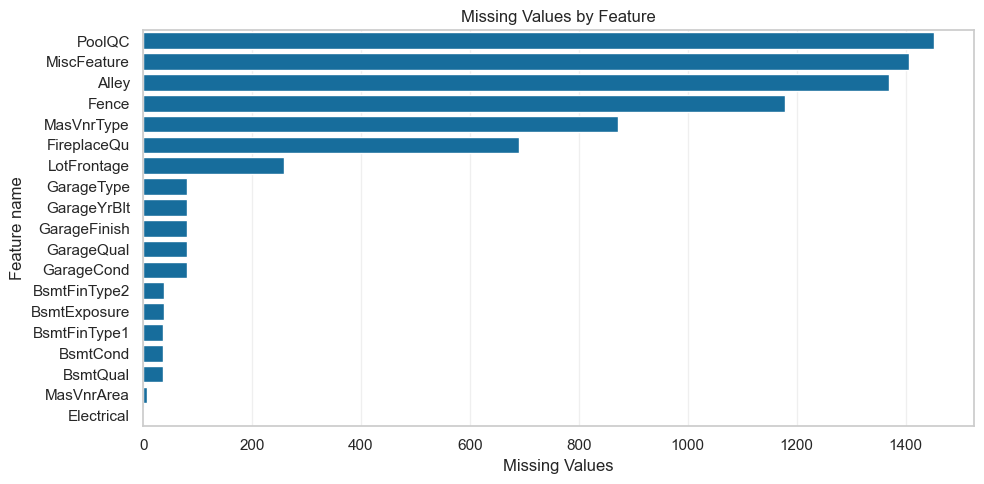

In [165]:
fig, ax = plt.subplots()
sns.barplot(x=missing_values.values, y=missing_values.index, ax=ax)
ax.set(title='Missing Values by Feature', xlabel='Missing Values', ylabel='Feature name')
plt.tight_layout()
plt.savefig(REPORTS_FIGURES / '01_missing_values.png', dpi=150)
plt.show()

## 4. Target Exploration
Since the target variable is right-skewed, it will be transformed using log as follows.

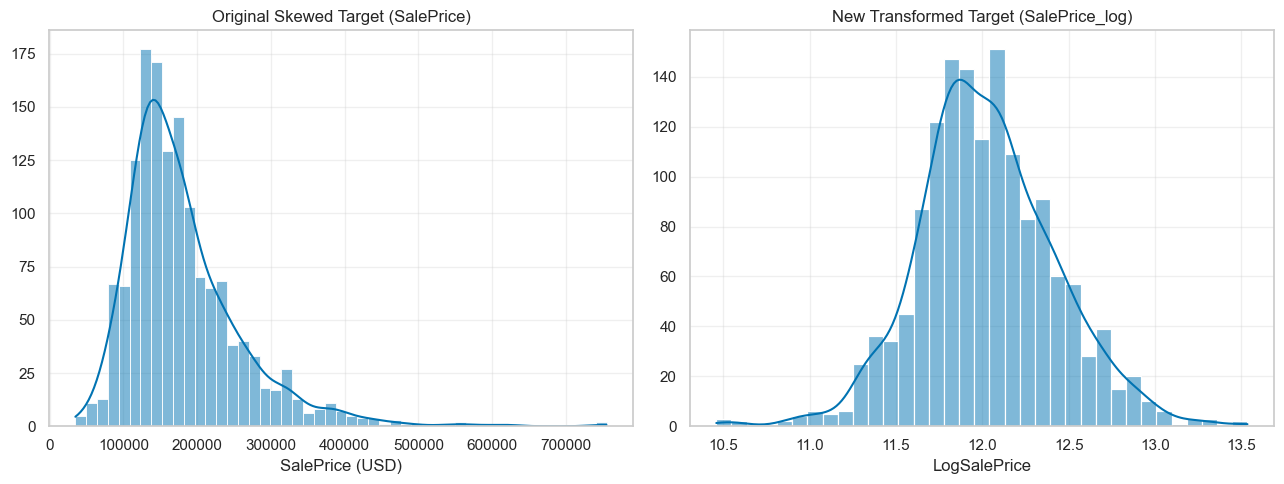

In [166]:
# Target Transformation
df['SalePrice_log'] = np.log1p(df['SalePrice'])

# Plot
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(13, 5))
sns.histplot(x=df['SalePrice'], kde=True, ax=ax1)
sns.histplot(x=df['SalePrice_log'], kde=True, ax=ax2)
ax1.set(title='Original Skewed Target (SalePrice)', xlabel='SalePrice (USD)', ylabel='')
ax2.set(title='New Transformed Target (SalePrice_log)', xlabel='LogSalePrice', ylabel='')
plt.tight_layout()
plt.savefig(REPORTS_FIGURES / '02_target_distribution.png', dpi=150)
plt.show()

## 5. Univariate Exploration

### 5.1. Numerical Features

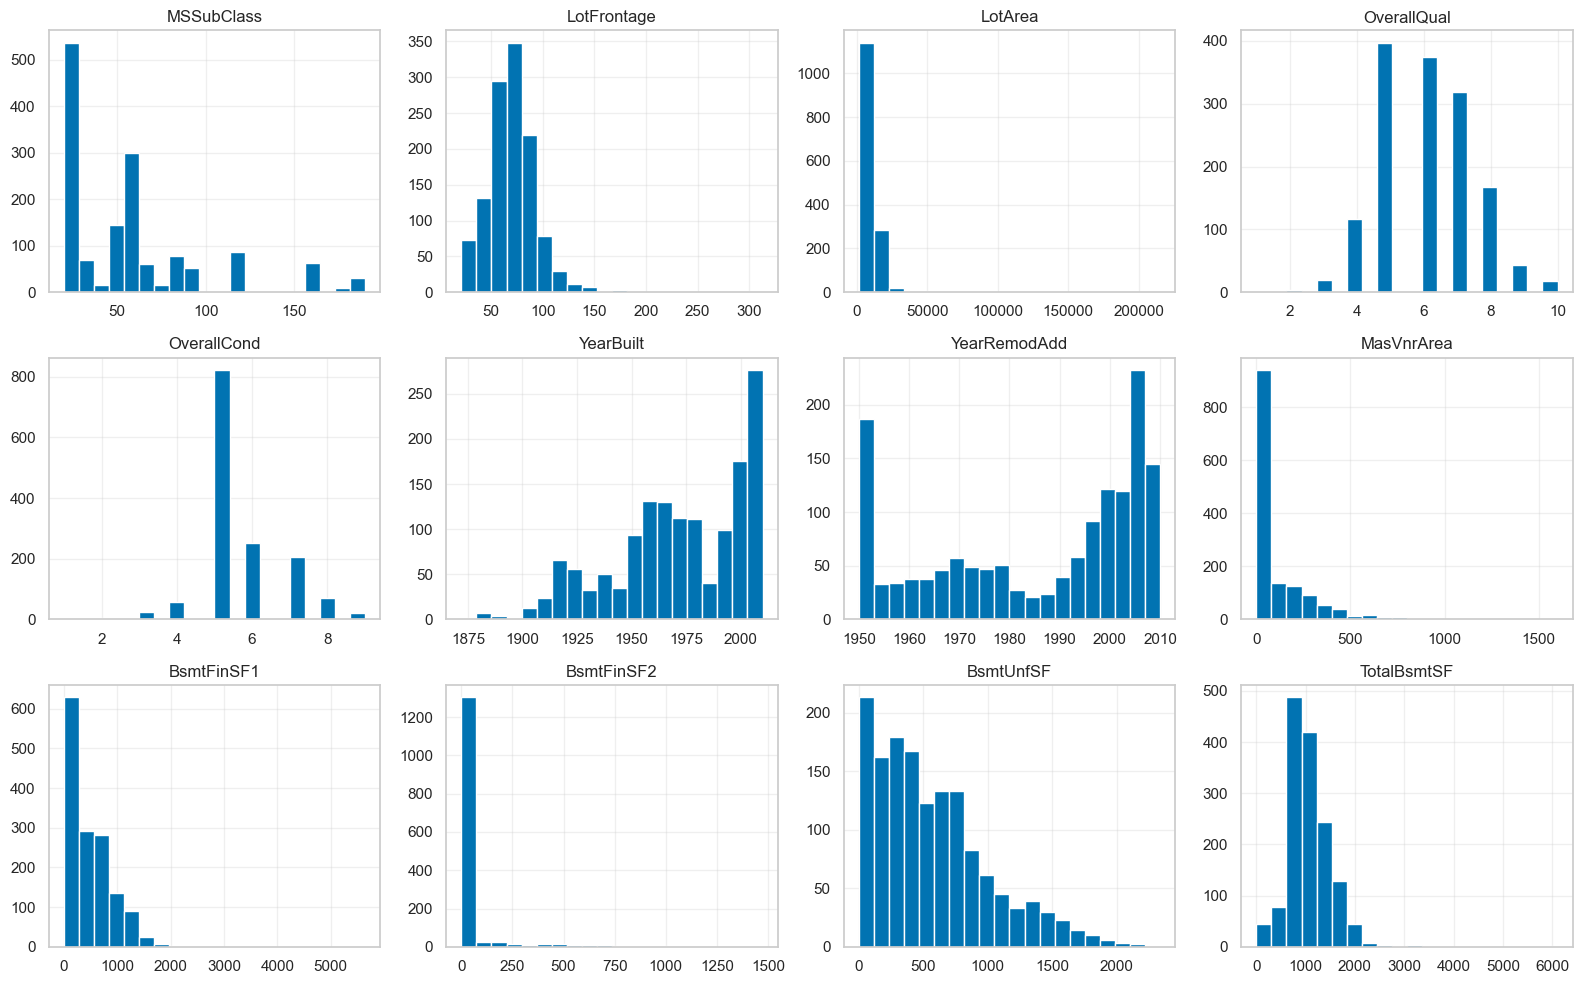

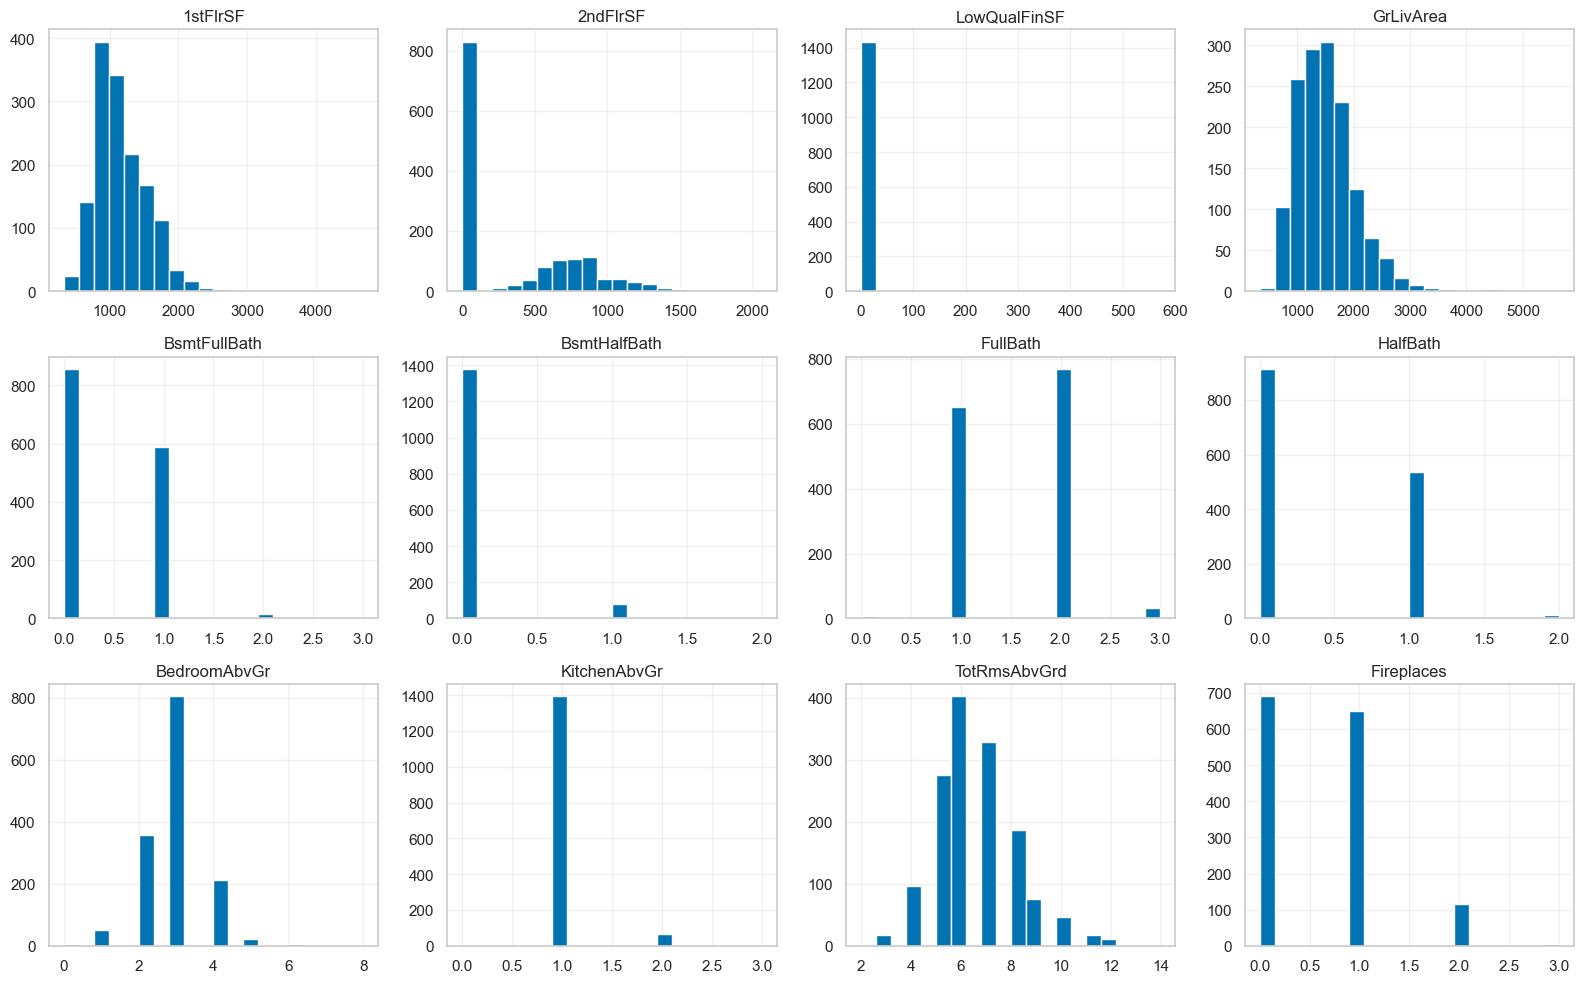

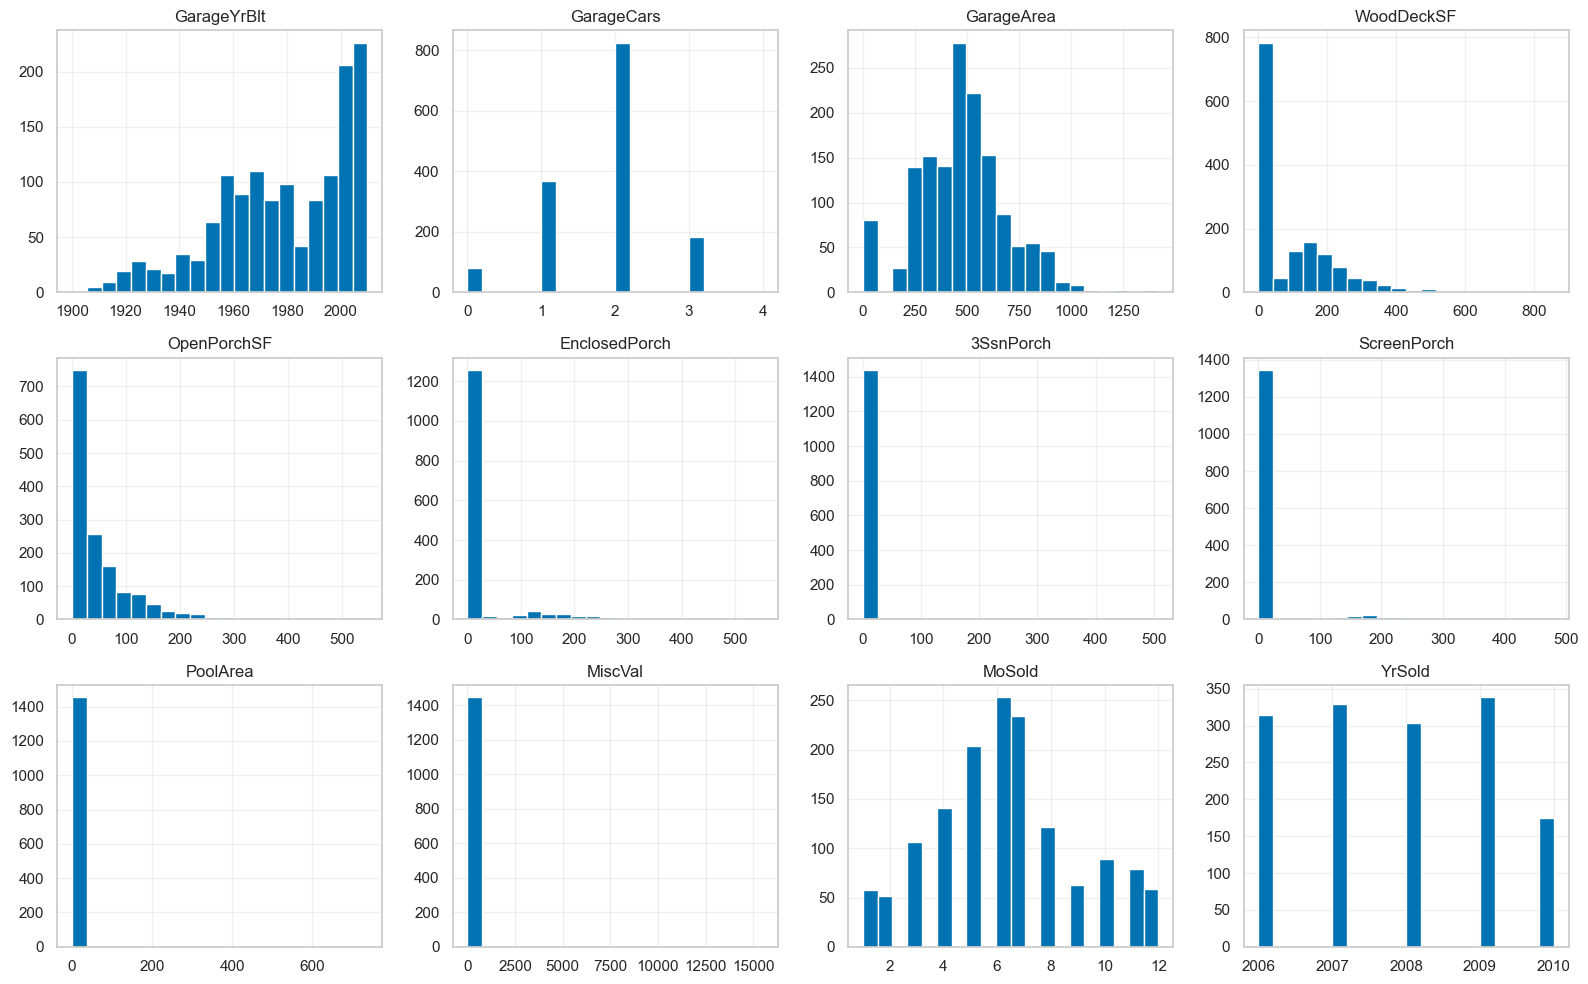

In [167]:
numeric_feature = df.select_dtypes(['int64', 'float64', 'number']).columns.tolist()
numeric_feature = [col for col in numeric_feature if col != 'Id' and col != 'SalePrice_log' and col != 'SalePrice']
chunk_size = len(numeric_feature) // 3

for i in range(0, len(numeric_feature), chunk_size):
    subset = numeric_feature[i:chunk_size+i]
    df[subset].hist(bins=20, figsize=(16, 10), layout=(3, 4))
    plt.tight_layout()
    plt.savefig(REPORTS_FIGURES / f'03_numeric_feat_distribution_{i//chunk_size+1}', dpi=150)
    plt.show()

### 5.2. Categorical Features

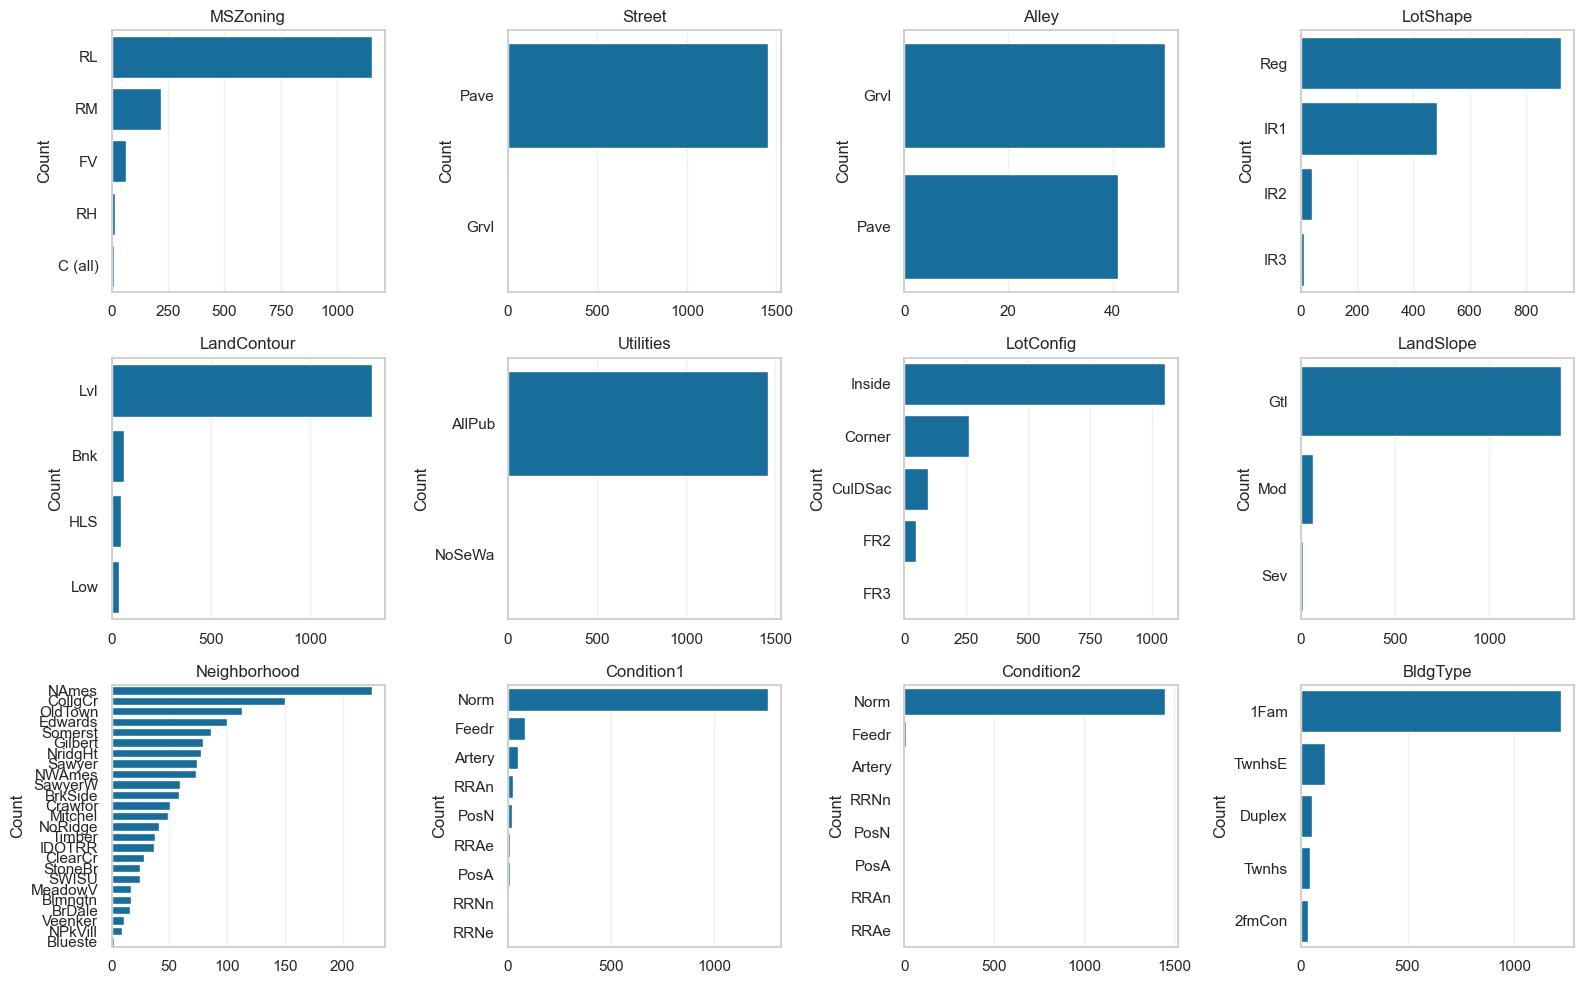

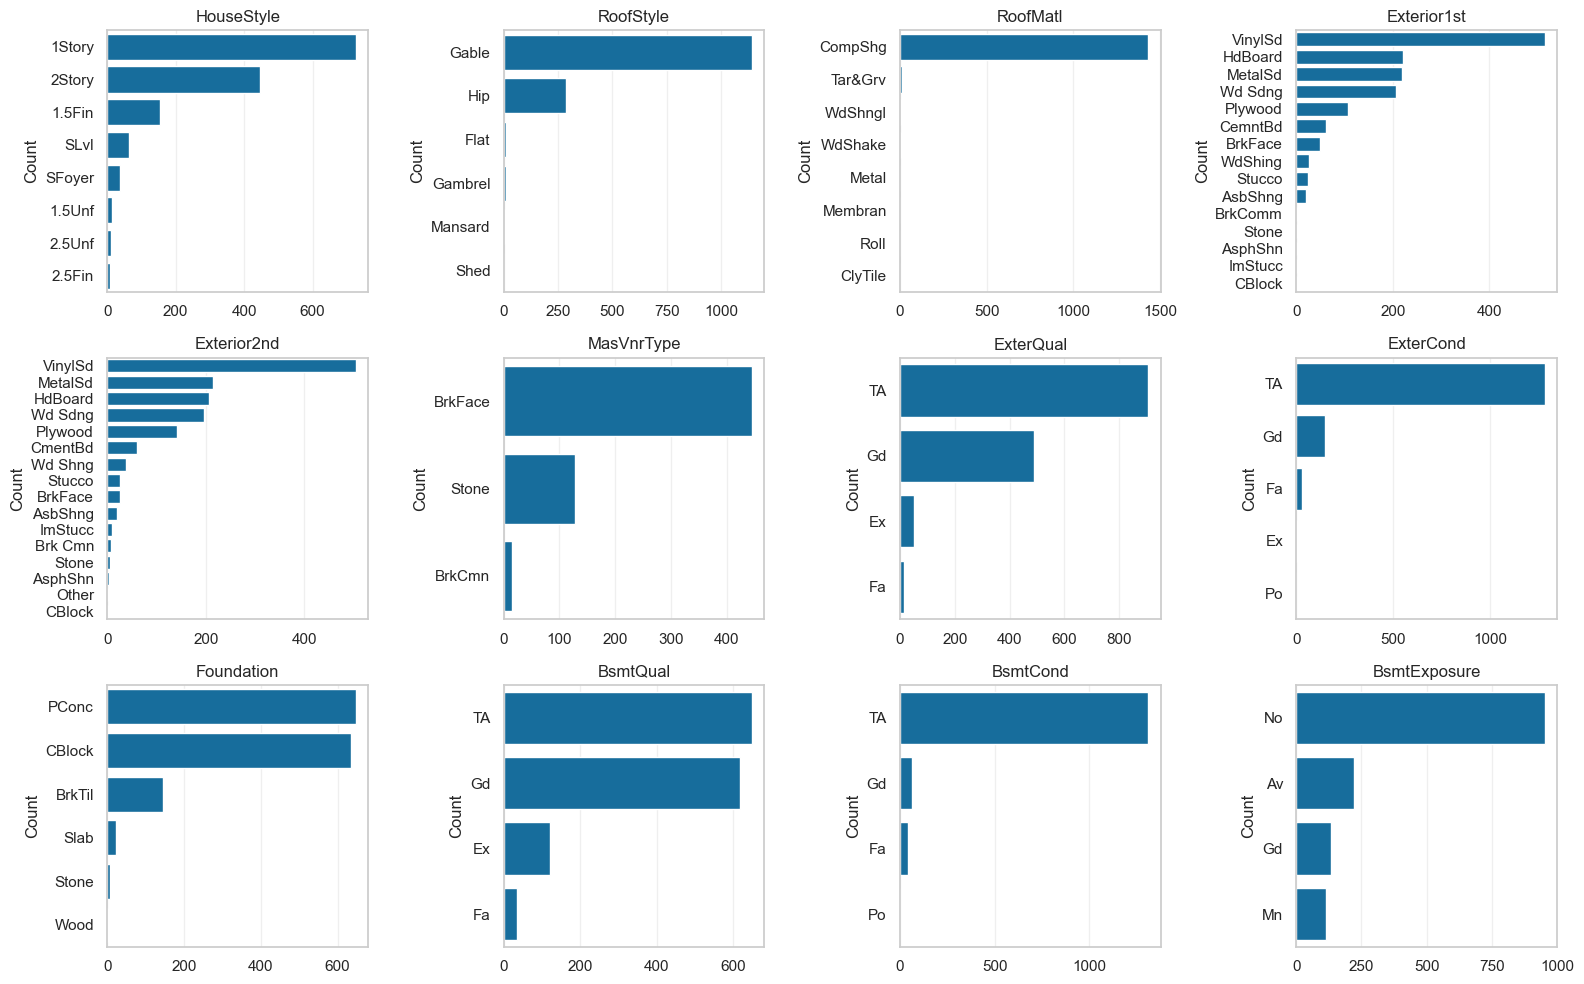

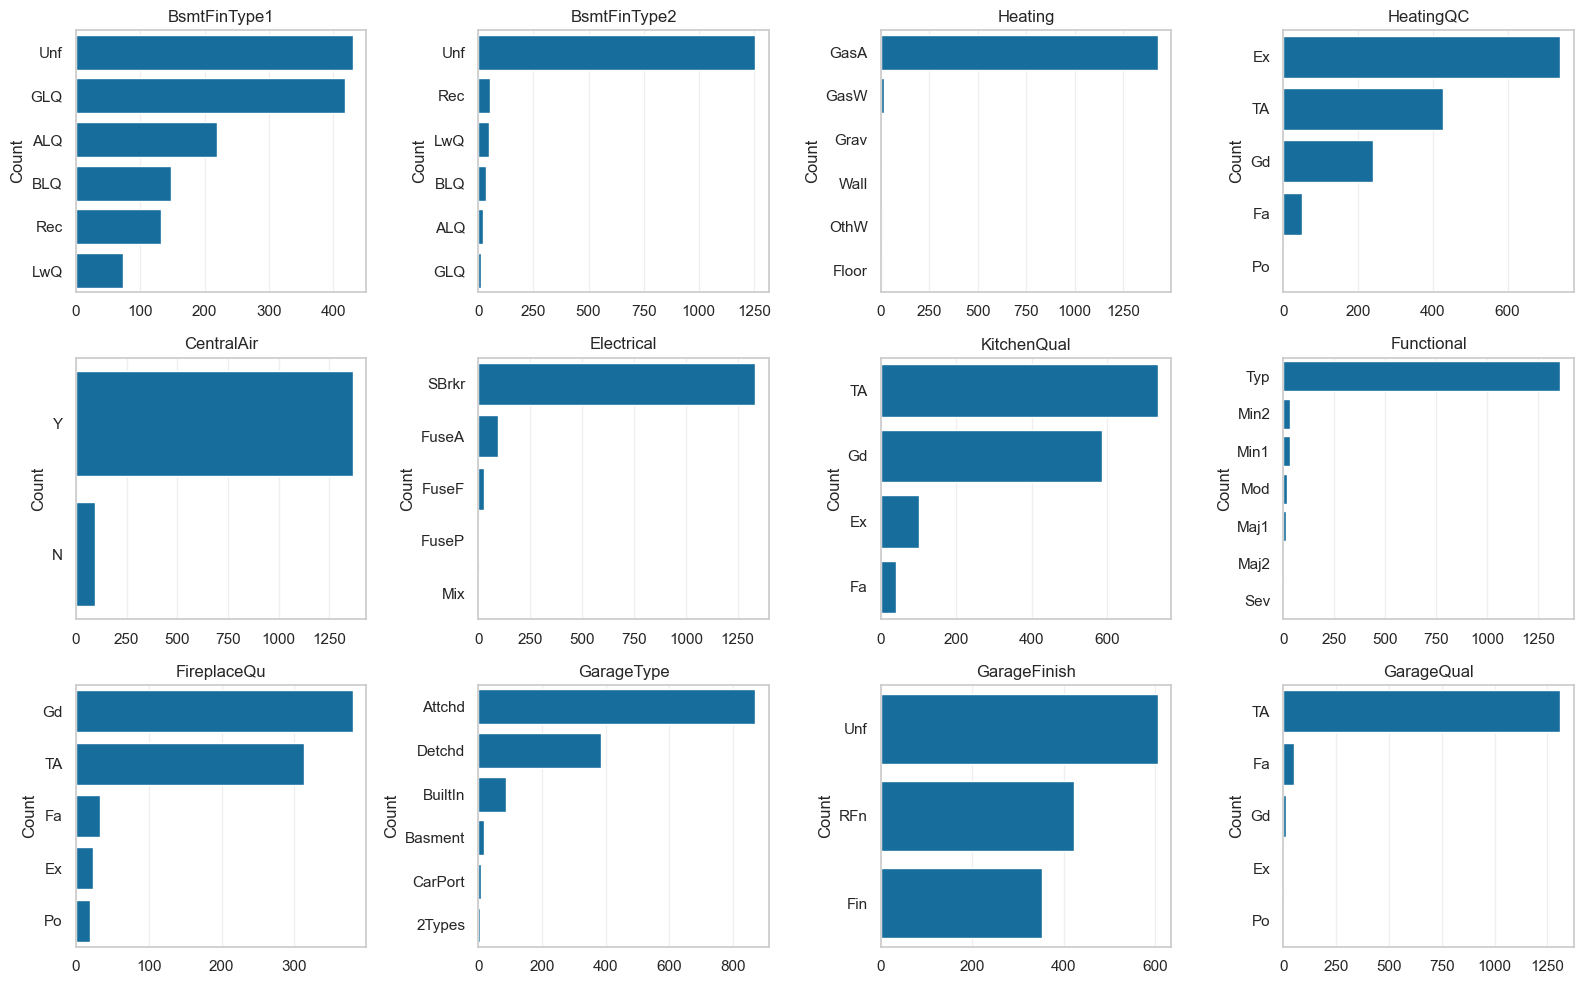

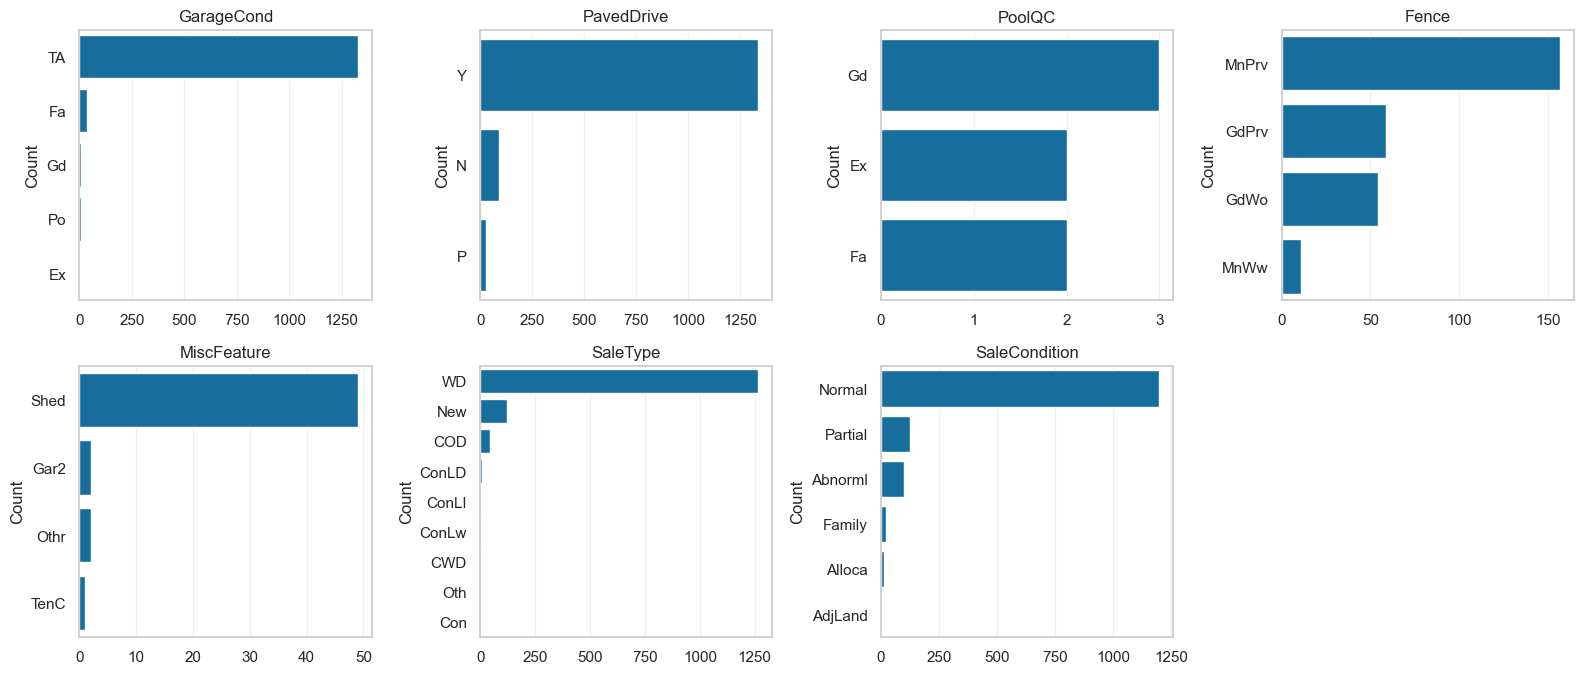

In [168]:
cat_feature = df.select_dtypes(include="object").columns
chunk_size = 12  # 3x4 layout
cols, rows = 4, 3

for i in range(0, len(cat_feature), chunk_size):
    subset = cat_feature[i:i + chunk_size]
    fig, axes = plt.subplots(rows, cols, figsize=(16, 10))
    axes = axes.flatten()

    for j, col in enumerate(subset):
        sns.countplot(y=df[col], order=df[col].value_counts().index, ax=axes[j])
        axes[j].set_title(col)
        axes[j].set_xlabel("")
        axes[j].set_ylabel("Count")

    # get rid of empty axes
    for k in range(len(subset), len(axes)):
        fig.delaxes(axes[k])

    plt.tight_layout()
    plt.savefig(REPORTS_FIGURES / f"04_categorical_feat_distribution_{i//chunk_size + 1}.png", dpi=150)
    plt.show()
    plt.close(fig)

## 6. Bivariate Exploration

### 6.1. Numerical Features

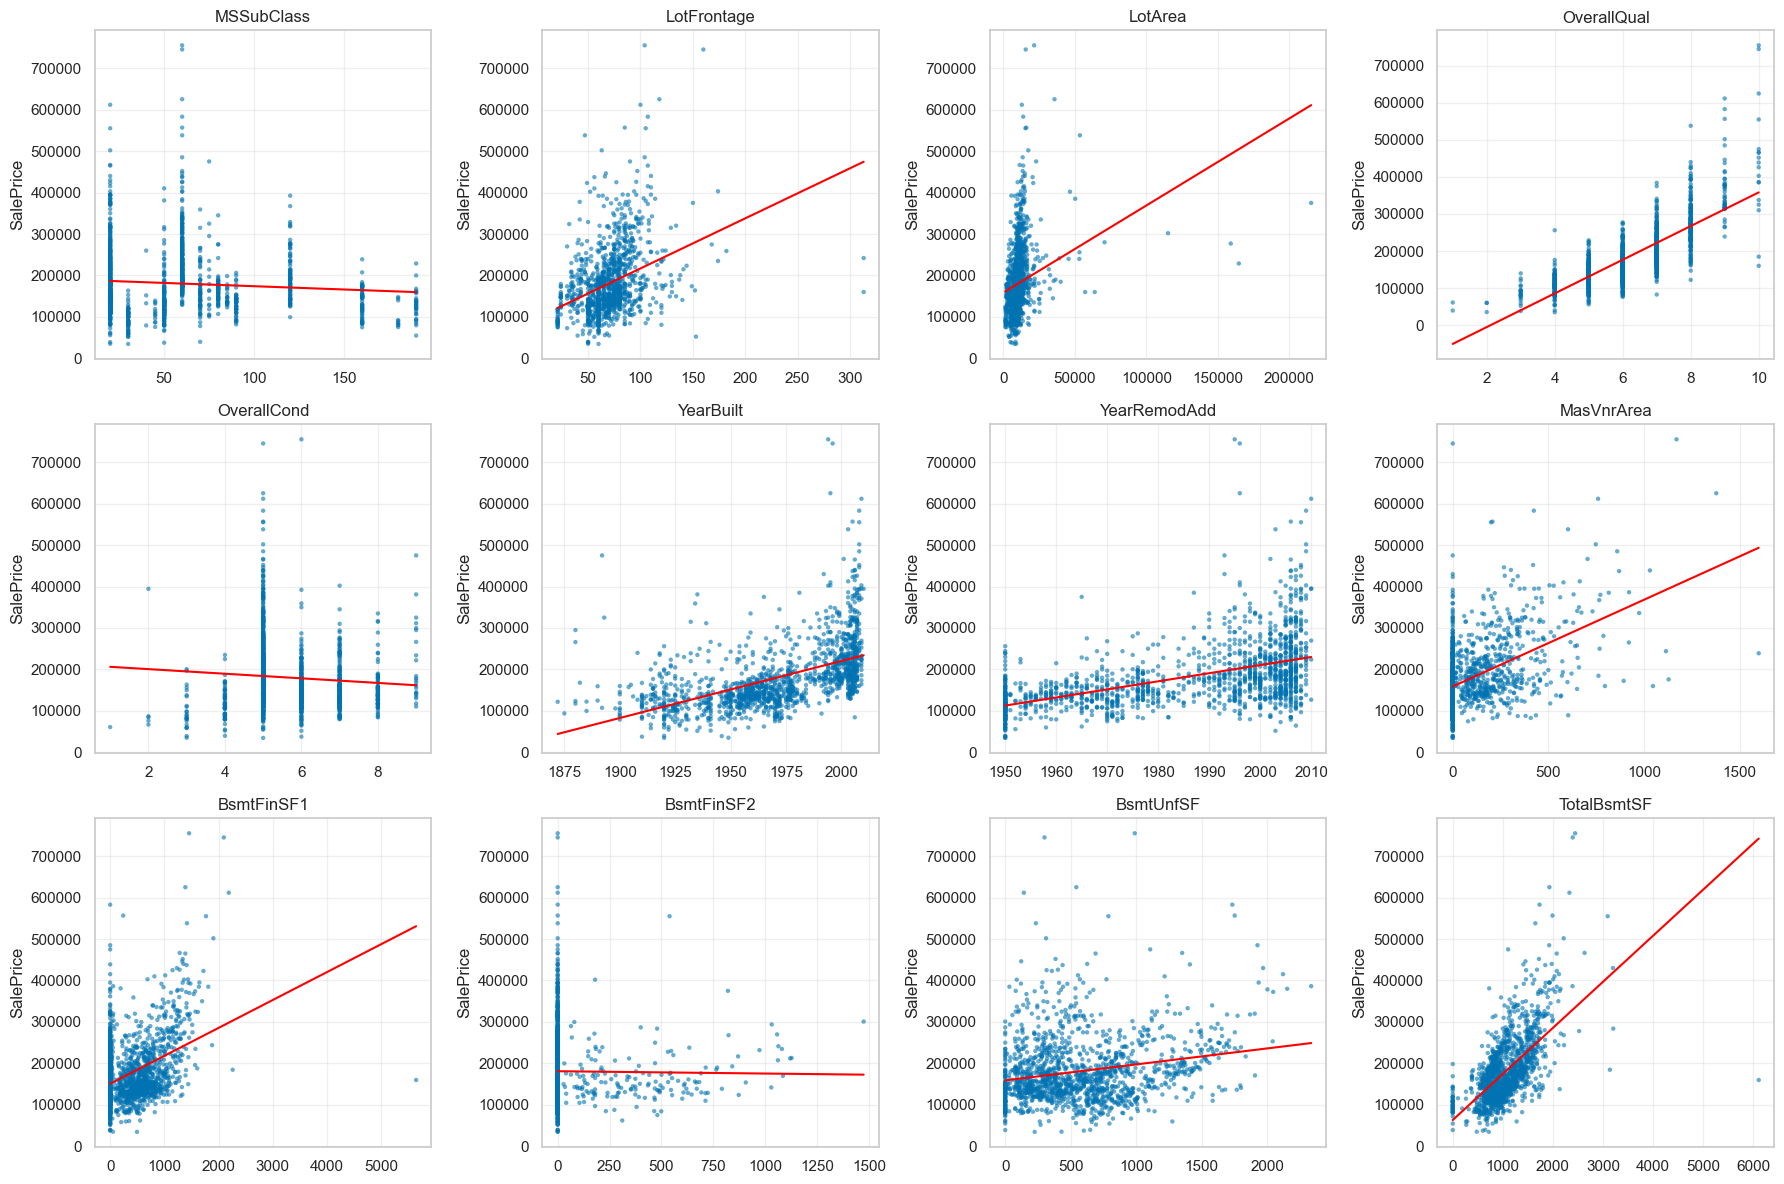

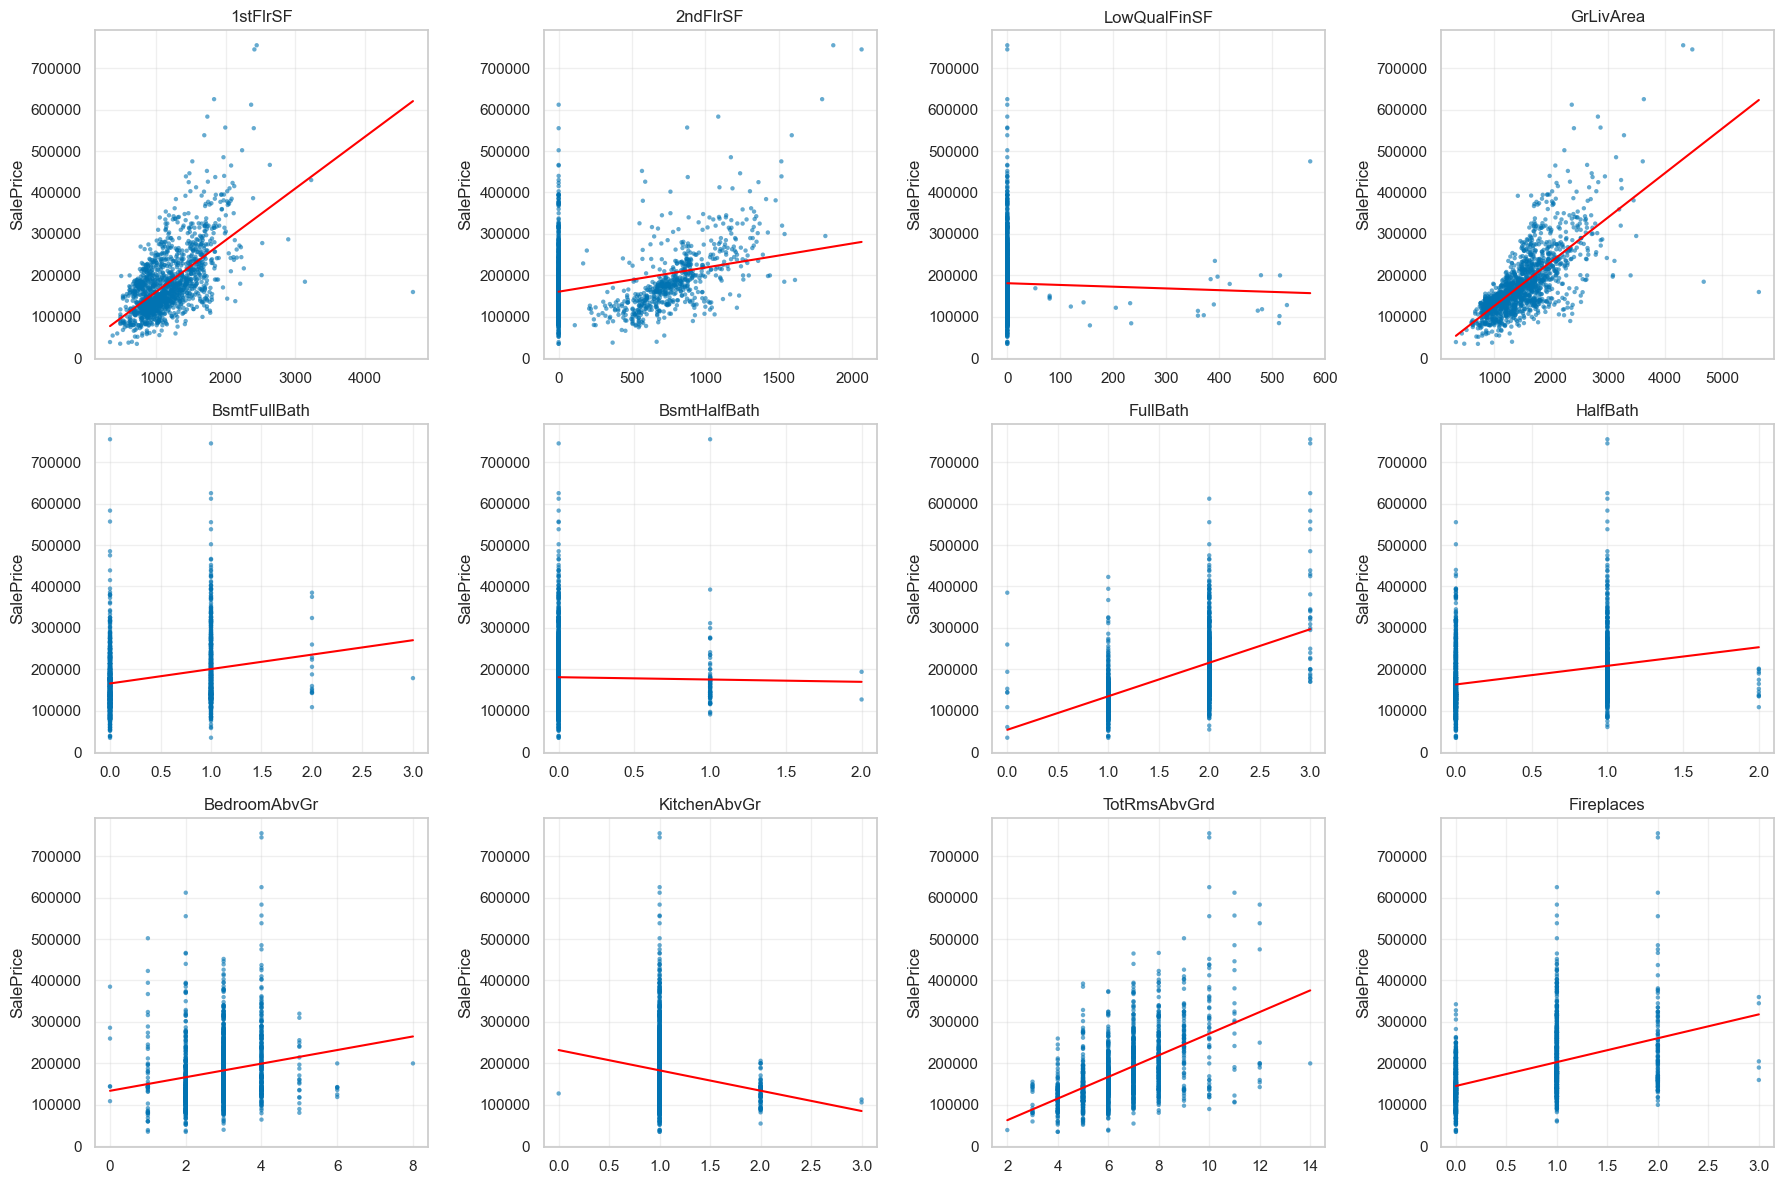

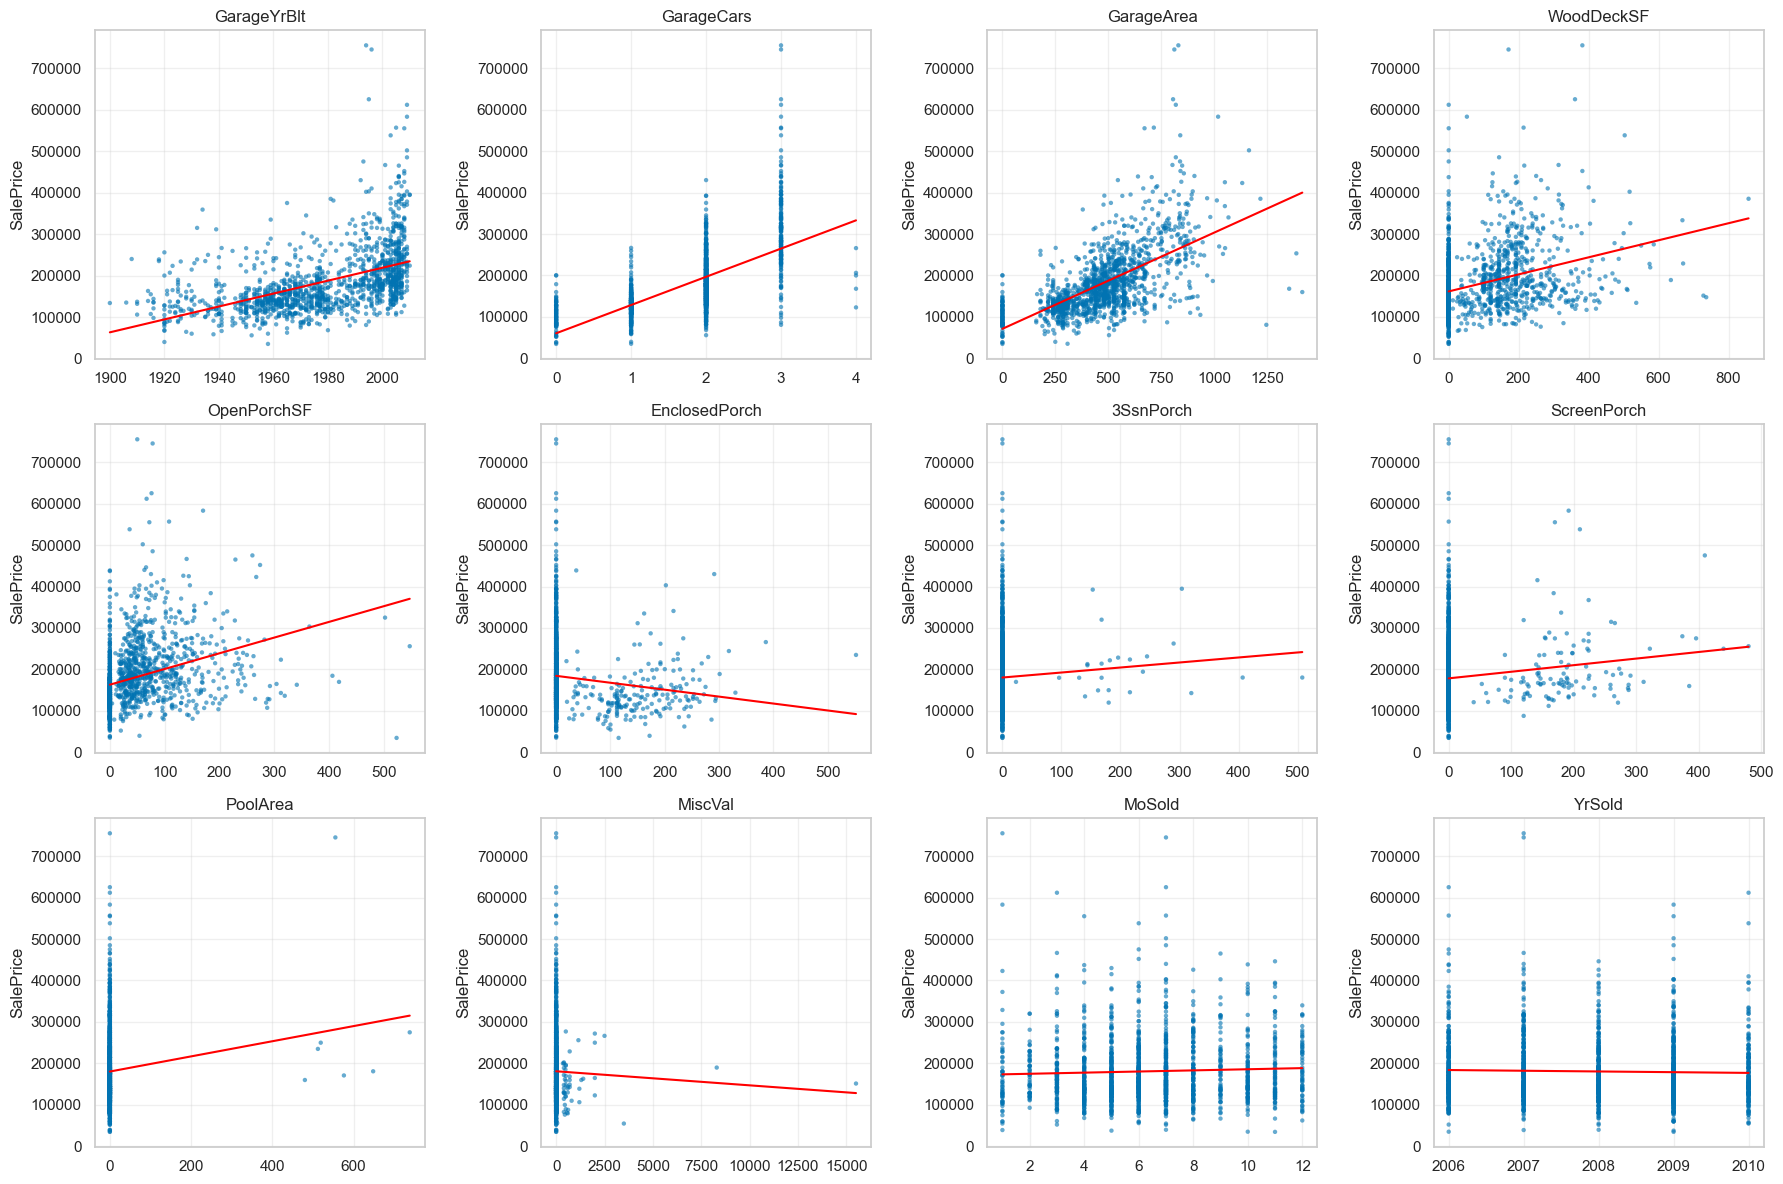

In [169]:
cols, rows = 4, 3
chunk_size = cols * rows

for i in range(0, len(numeric_feature), chunk_size):
    subset = numeric_feature[i:i + chunk_size]
    fig, axes = plt.subplots(rows, cols, figsize=(18, 12))
    axes = axes.flatten()

    for j, col in enumerate(subset):
        sns.regplot(data=df, x=col, y='SalePrice', ax=axes[j], scatter_kws={'s': 10, 'alpha': 0.6, 'edgecolor': 'none'}, line_kws={'color': 'red', "lw": 1.5}, ci=None)
        axes[j].set_title(col)
        axes[j].set_xlabel("")
        axes[j].set_ylabel("SalePrice")

    for k in range(len(subset), len(axes)):
        fig.delaxes(axes[k])

    plt.tight_layout()
    plt.savefig(REPORTS_FIGURES / f"05_numeric_vs_target_{i//chunk_size + 1}.png", dpi=150)
    plt.show()
    plt.close(fig)

### 6.2. Categorical Features

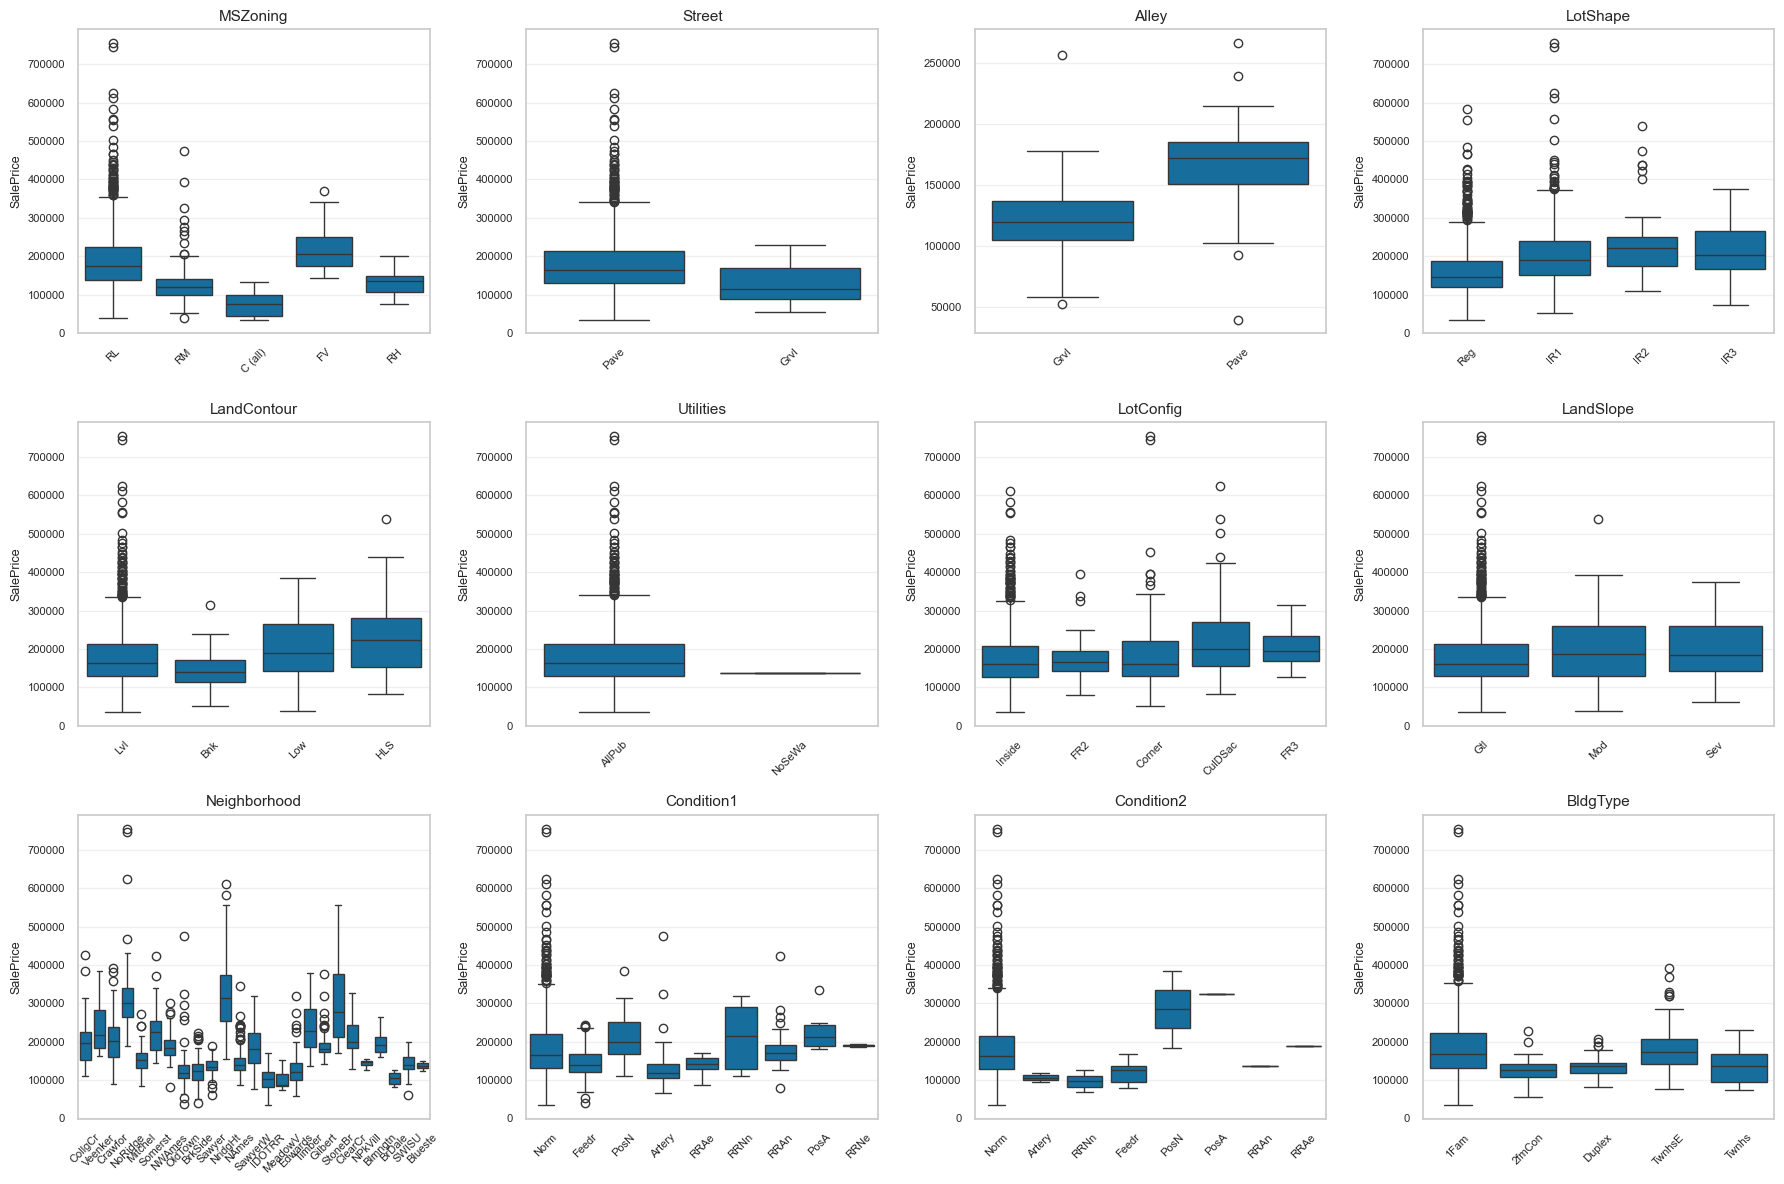

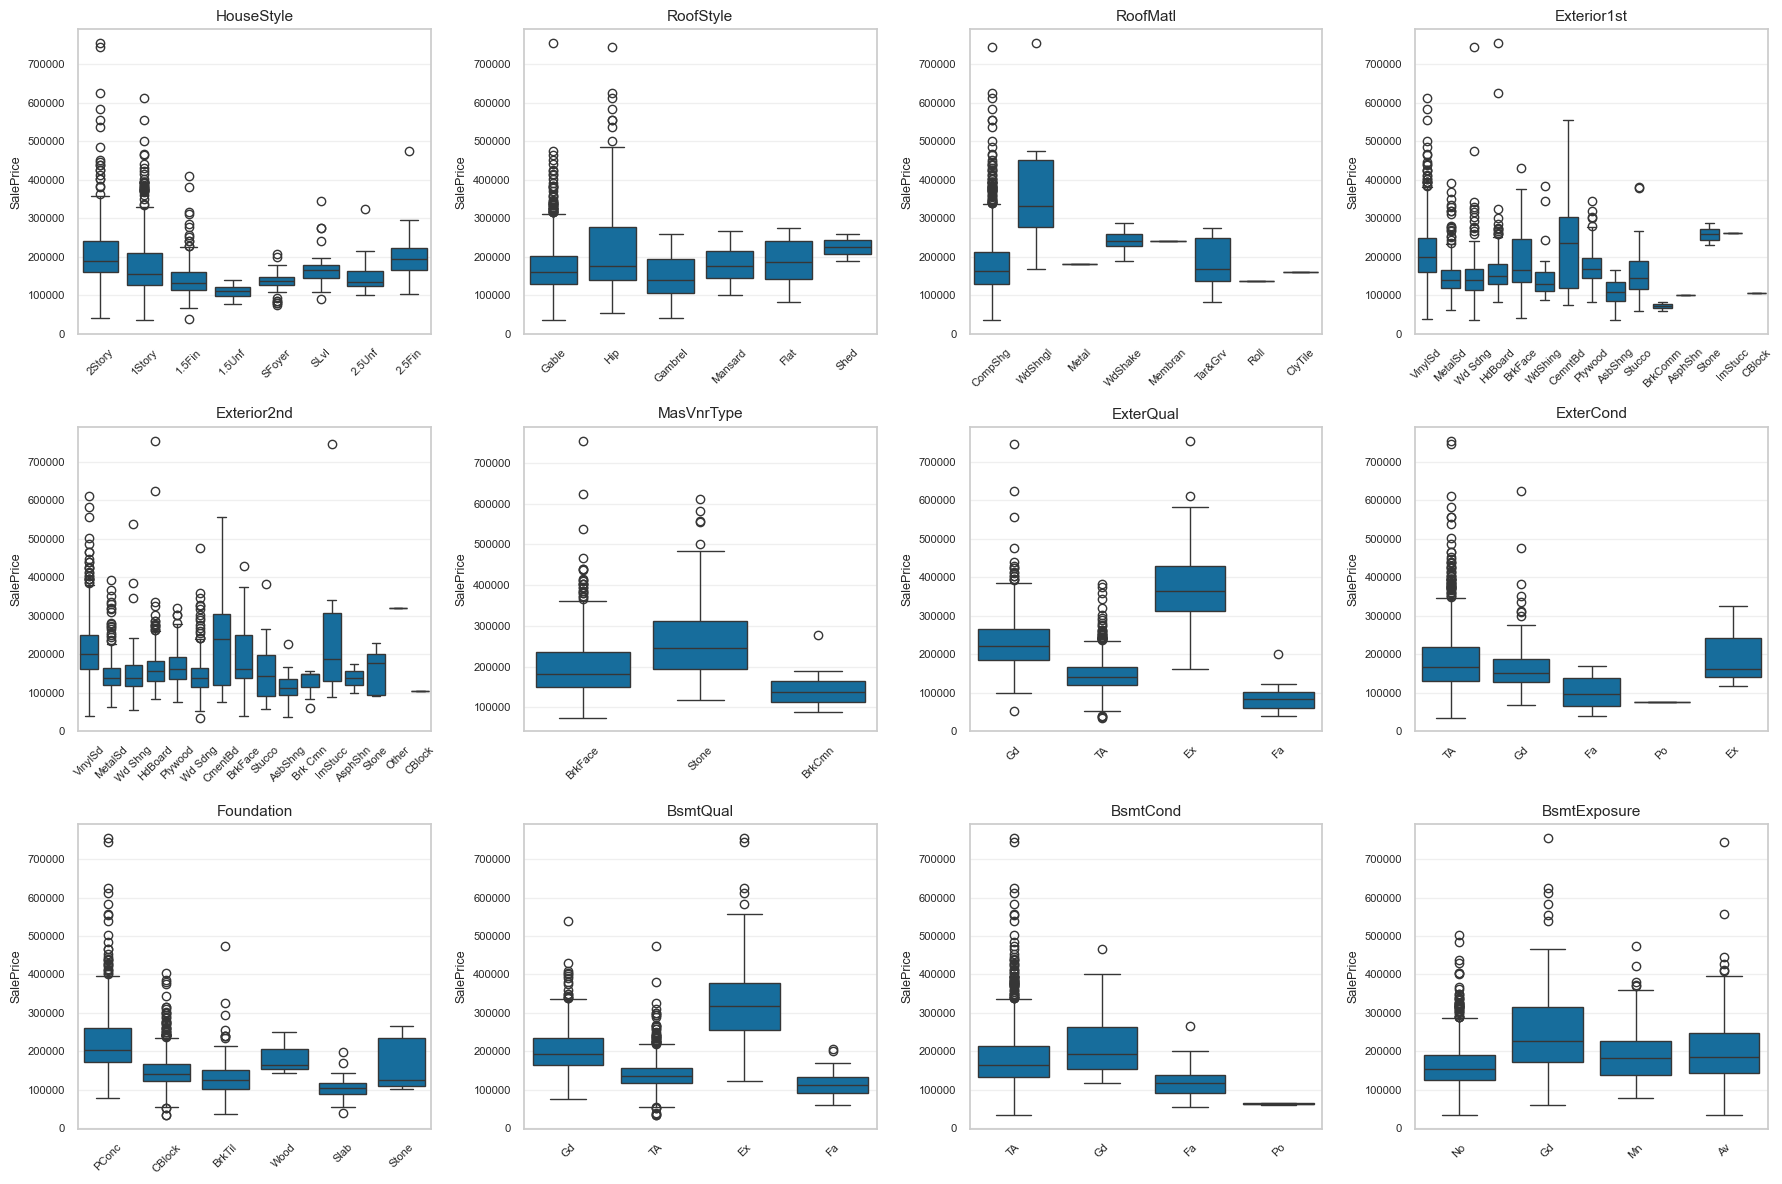

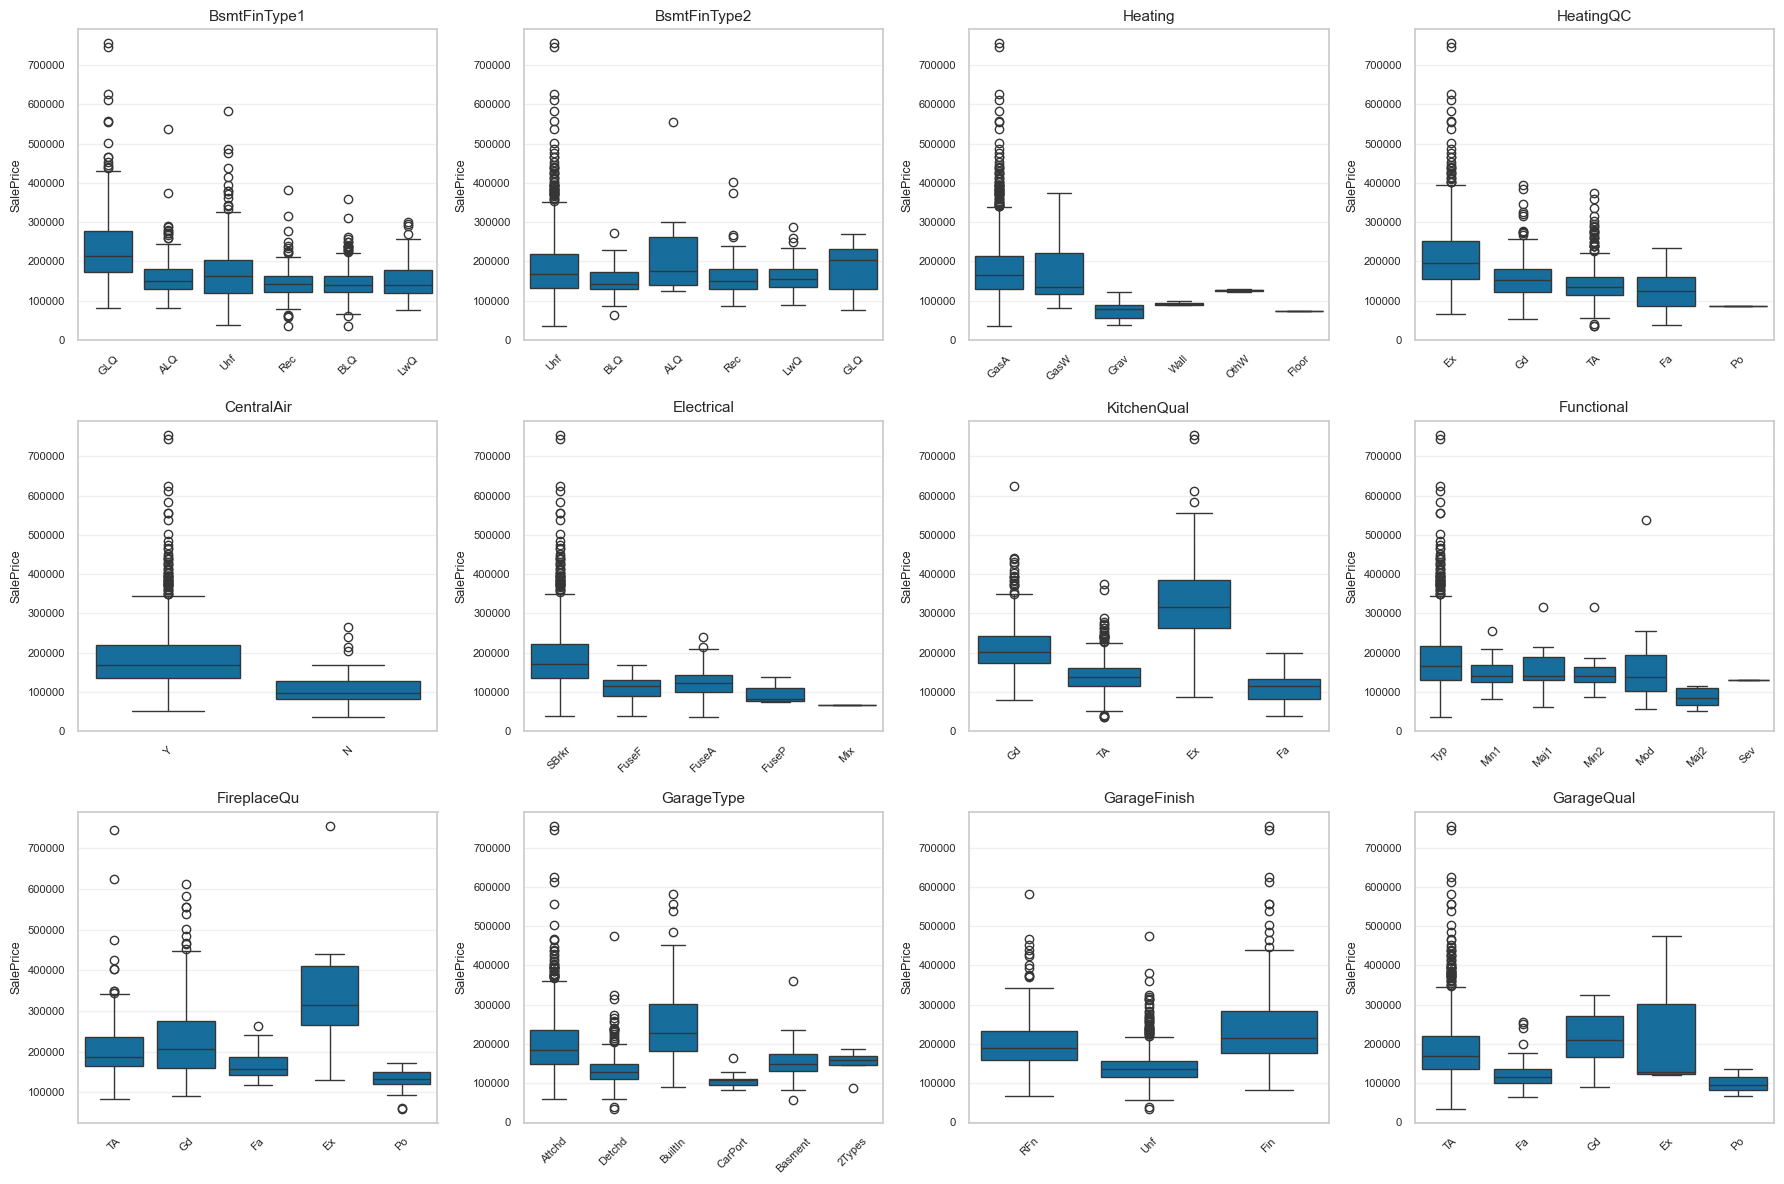

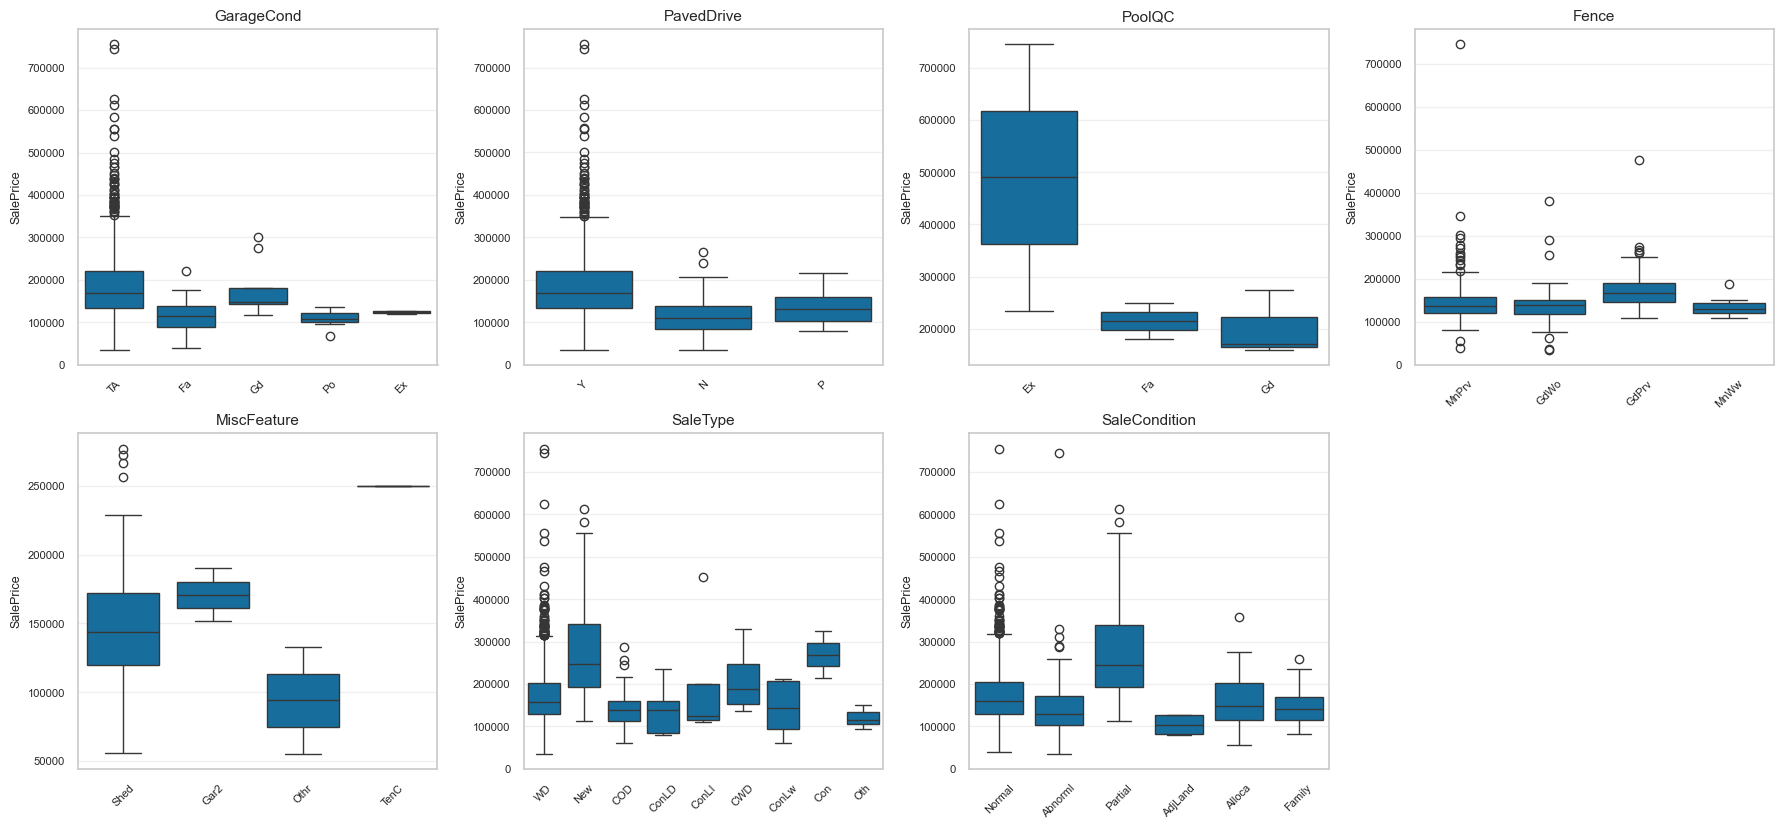

In [170]:
cols, rows = 4, 3
chunk_size = cols * rows
cat_feature = df.select_dtypes(include=["object"]).columns.tolist()

for i in range(0, len(cat_feature), chunk_size):
    subset = cat_feature[i:i + chunk_size]
    fig, axes = plt.subplots(rows, cols, figsize=(18, 12))
    axes = axes.flatten()

    for j, col in enumerate(subset):
        sns.boxplot(data=df, x=col, y='SalePrice', ax=axes[j])
        axes[j].set_title(col, fontsize=11)
        axes[j].set_xlabel("", fontsize=9)
        axes[j].set_ylabel("SalePrice", fontsize=9)
        axes[j].tick_params(axis='x', labelsize=8, rotation=45)
        axes[j].tick_params(axis='y', labelsize=8)

    for k in range(len(subset), len(axes)):
        fig.delaxes(axes[k])

    plt.tight_layout()
    plt.savefig(REPORTS_FIGURES / f"06_categorical_vs_target_{i//chunk_size + 1}.png", dpi=150)
    plt.show()
    plt.close(fig)

## 7. Outliers Handling

In [171]:
# Potential outliers
key_feat = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', 'OverallQual', 'Neighborhood', 'HouseStyle', 'MSZoning', 'SalePrice', 'BsmtQual', 'YearBuilt', 'OverallCond']
o1 = df[(df['TotalBsmtSF'] > 6000) & (df['SalePrice'] < 200000)][key_feat]
o2 = df[(df['GrLivArea'] > 4500) & (df['SalePrice'] < 200000)][key_feat]
o3 = df[(df['OverallQual'] == 10) & (df['SalePrice'] < 350000)][key_feat]
o4 = df[(df['BsmtQual'] == 'Ex') & (df['SalePrice'] < 150000)][key_feat]
potential_outliers = pd.concat([o1, o2, o3, o4])
potential_outliers.sort_index()

,GrLivArea,TotalBsmtSF,GarageArea,OverallQual,Neighborhood,HouseStyle,MSZoning,SalePrice,BsmtQual,YearBuilt,OverallCond
523,4676,3138,884,10,Edwards,2Story,RL,184750,Ex,2007,5
523,4676,3138,884,10,Edwards,2Story,RL,184750,Ex,2007,5
583,2775,1237,880,10,OldTown,2.5Unf,RM,325000,TA,1893,9
697,1148,980,308,5,Edwards,1Story,RL,123500,Ex,1952,7
994,1718,1700,786,10,NridgHt,1Story,RL,337500,Ex,2006,5
1298,5642,6110,1418,10,Edwards,2Story,RL,160000,Ex,2008,5
1298,5642,6110,1418,10,Edwards,2Story,RL,160000,Ex,2008,5
1298,5642,6110,1418,10,Edwards,2Story,RL,160000,Ex,2008,5
1324,1795,1795,895,8,Somerst,1Story,RL,147000,Ex,2006,5
1442,2007,1017,812,10,Somerst,2Story,FV,310000,Ex,2008,5


Both records #523 and #1298 (Edwards, quality 10, >7000 sq ft, <$300k) are inconsistent with economic logic and with the rest of the dataset, and should therefore be removed. Edwards is a low-to-mid-priced neighborhood in Ames and no house in that neighborhood is rated 10 or has 10,000 square feet. These samples were incorrectly recorded or the sale was exceptional, but we should get rid of them anyways as they would distort the correlation between SalePrice and TotalSF (reducing R²).

In [172]:
df = df.drop([523, 1298])

## 8. Ordinal Encoding
By looking at all figures, the categorical feature `BsmtFinType` has high diversity between its types, and its boxplot shows an unexpected behavior, since it does not follow the logical pattern explained by the autor in [**data_description.txt**](../data/raw/data_description.txt):  
**BsmtFinType1**, Rating of basement finished area which is *GLQ > ALQ > BLQ > Rec > Unf > NA*, **but** *GLQ > Unf > ALQ > LwQ > BLQ > Rec > NA* considering:

In [173]:
df.groupby('BsmtFinType1')['SalePrice'].mean().sort_values(ascending=False)

BsmtFinType1
GLQ    235716.790865
Unf    170670.576744
ALQ    161573.068182
LwQ    151852.702703
BLQ    149493.655405
Rec    146889.248120
Name: SalePrice, dtype: float64

In [174]:
# Ordinal maps
qual_map = {np.nan: 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
fin_map = {np.nan: 0, "Rec": 1, 'BLQ': 2, 'LwQ': 3, 'ALQ': 4, 'Unf': 3, 'GLQ': 4}

ord_cols = {
    'ExterQual': qual_map,
    'ExterCond': qual_map,
    'BsmtQual': qual_map,
    'BsmtCond': qual_map,
    'HeatingQC': qual_map,
    'KitchenQual': qual_map,
    # 'FireplaceQu': qual_map, distorts the ComponentsQual feature, but a Fireplace is not that important
    'GarageQual': qual_map,
    'GarageCond': qual_map,
    'BsmtFinType1': fin_map,
}

for col, mapping in ord_cols.items():
    if col in df.columns:
        df[f"{col}_ord"] = df[col].map(mapping)

df_ords_qual = df.loc[:, 'ExterQual_ord':'GarageCond_ord']

## 9. Feature Engineering
New features were designed to capture relevant patterns and combine less important features into an important one:
- `TotalSF` = `GrLivArea` + 0.8 * `TotalBsmtSF`  
- `TotalBathrooms` = `FullBath` + 0.5 * `HalfBath` + 0.8 * (`BsmtFullBath` + 0.5 * `BsmtHalfBath`)
- `Age` = `YrSold` - `YearBuilt`
- `PorchSF` = `OpenPorchSF` + `EnclosedPorch` + `3SsnPorch` + `ScreenPorch`
- `ComponentsQual` = Ordinal_Features_Qual average (mapped before)
- `HasBsmt`, `HasGarage`, `Has2ndFloor` & `HasPool` (only pools in Excellent conditions according to figures) [0, 1]
- `Remodeled` = if `YearBuilt` not = `YearRemodAdd`
- `MoSold_cat` = Categorical Transform to `MoSold`

> Encoding and Feature Engineering will be stored as a script in `../src/build_features.py` in order to apply it to external tests.  
> It does not include outliers handling nor target transformation.

In [175]:
df['TotalSF'] = df['GrLivArea'] + 0.8 * df['TotalBsmtSF'] + df['LotFrontage'].fillna(0) * 0.1
df['TotalBathrooms'] = df['FullBath'] + 0.5 * df['HalfBath'] + 0.8 * (df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath'])
df['Age'] = df['YrSold'] - df['YearBuilt']
df['PorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
df['ComponentsQual'] = df_ords_qual.mean(axis=1).round(3)
df['HasBsmt'] = df["BsmtQual"].notna().astype(int)  # notna() -> bool -> astype(int) -> int [0, 1]
df['HasGarage'] = df['GarageQual'].notna().astype(int)
df['Has2ndFloor'] = (df['2ndFlrSF'] > 0).astype(int)
df['HasPool'] = (df['PoolQC'] == 'Ex').astype(int)
df['Remodeled'] = (df['YearBuilt'] != df['YearRemodAdd']).astype(int)
df['MoSold_cat'] = df['MoSold'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

df[['TotalSF', 'TotalBathrooms', 'Age', 'PorchSF', 'ComponentsQual', 'HasBsmt', 'HasGarage', 'Has2ndFloor', 'HasPool', 'Remodeled', 'MoSold']].head(3)

,TotalSF,TotalBathrooms,Age,PorchSF,ComponentsQual,HasBsmt,HasGarage,Has2ndFloor,HasPool,Remodeled,MoSold
0,2401.3,3.3,5,61,3.625,1,1,1,0,0,2
1,2279.6,2.4,31,0,3.375,1,1,0,0,0,5
2,2528.8,3.3,7,42,3.625,1,1,1,0,1,9


## 10. Correlation Insights

### Correlation map

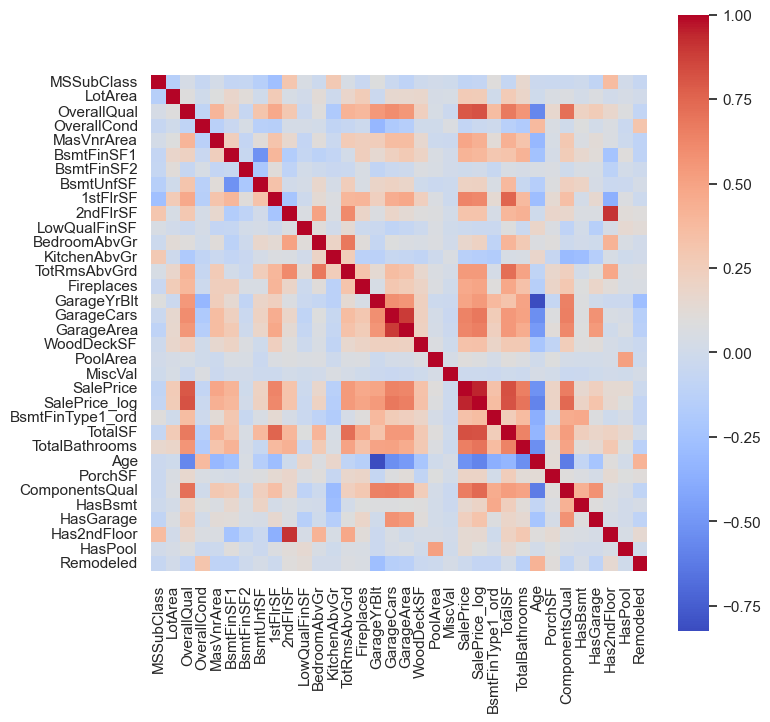

In [176]:
to_remove_num = ['MoSold', 'YearRemodAdd', 'LotFrontage', 'Id', 'GrLivArea', 'TotalBsmtSF', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'YrSold', 'YearBuilt', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
df1 = df.drop(to_remove_num, axis=1)
corr = df1.drop(df_ords_qual.columns, axis=1).select_dtypes(['number', 'int64', 'float64']).corr()

plt.figure(figsize=(8,8))
sns.heatmap(corr.fillna(0), cmap='coolwarm', square=True, xticklabels=True, yticklabels=True)
plt.xticks(rotation=90)
plt.savefig(REPORTS_FIGURES / f"07_correlation_map.png", dpi=150)
plt.show()

In [177]:
# Remove features used to create new ones, as well as those that might cause multicollinearity (see corr map), such as 1stFlrSF & 2nd (TotalSF used).
to_remove_corr = ['1stFlrSF', '2ndFlrSF', 'GarageArea', 'SalePrice_log', 'SalePrice']
cols = df.drop(to_remove_num + to_remove_corr, axis=1).drop(df_ords_qual.columns, axis=1).select_dtypes(['number', 'int64', 'float64']).columns
corr_list = []
for col in cols:
    corr_list.append(np.abs(df['SalePrice'].corr(df[col])))

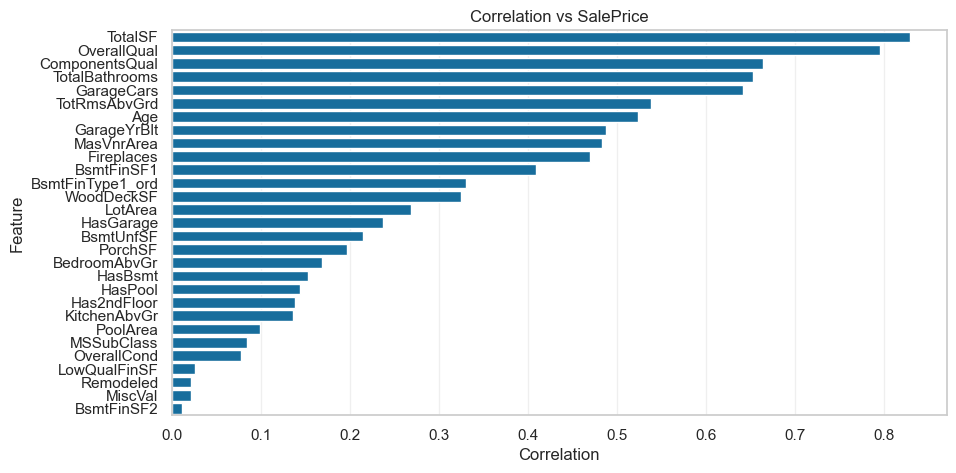

In [178]:
corr_df = pd.DataFrame({'Feature': cols, 'Correlation': corr_list}).sort_values('Correlation', ascending=False)
sns.barplot(data=corr_df, x='Correlation', y='Feature')
plt.title('Correlation vs SalePrice')
plt.savefig(REPORTS_FIGURES / f"08_correlation_plot.png", dpi=150)
plt.show()

## 11. Feature Selection for Modeling

The features used in Feature Engineering and the least important ones will be removed, including those with low diversity (see categorical distribution figure), overlapping boxplots with no clear difference between categories and many outliers (see categorical vs. target figure), and those containing many missing values (>80%) (see missing values figure).


In [179]:
to_remove_cat = ['PoolQC', 'MiscFeature', 'Fence', 'MasVnrType', 'FireplaceQu', 'Electrical', 'Functional', 'Heating', 'Alley',
                 'BsmtFinType2', 'CentralAir', 'Street', 'LotShape', 'RoofMatl', 'Utilities', 'Condition1', 'Condition2', 'RoofStyle',
                 'LandContour', 'LandSlope', 'BldgType', 'SaleType', 'PavedDrive','SaleCondition', 'LotConfig', 'Exterior2nd']
cat_cols = df.select_dtypes(['object', 'string']).drop(list(ord_cols.keys()), axis=1).drop(to_remove_cat, axis=1).columns
cat_cols, len(cat_cols)

(Index(['MSZoning', 'Neighborhood', 'HouseStyle', 'Exterior1st', 'Foundation',
        'BsmtExposure', 'GarageType', 'GarageFinish', 'MoSold_cat'],
       dtype='object'),
 9)

In [180]:
# Same proccedure is done with numerical features:
num_cols = cols.copy()
to_remove_num = ['BsmtFinSF2', 'MiscVal', 'LowQualFinSF', 'PoolArea', 'BsmtUnfSF', 'BedroomAbvGr', 'GarageYrBlt', 'KitchenAbvGr']
num_cols = df[num_cols].select_dtypes(['number', 'int64', 'float64']).drop(to_remove_num, axis=1).columns
num_cols, len(num_cols)

(Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
        'BsmtFinSF1', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'WoodDeckSF',
        'BsmtFinType1_ord', 'TotalSF', 'TotalBathrooms', 'Age', 'PorchSF',
        'ComponentsQual', 'HasBsmt', 'HasGarage', 'Has2ndFloor', 'HasPool',
        'Remodeled'],
       dtype='object'),
 21)

In [181]:
df_finished.head(3)

,MSZoning,Neighborhood,HouseStyle,Exterior1st,Foundation,BsmtExposure,GarageType,GarageFinish,MoSold_cat,MSSubClass,...,Age,PorchSF,ComponentsQual,HasBsmt,HasGarage,Has2ndFloor,HasPool,Remodeled,SalePrice_log,SalePrice
0,RL,CollgCr,2Story,VinylSd,PConc,No,Attchd,RFn,Feb,60,...,5,61,3.625,1,1,1,0,0,12.247699,208500
1,RL,Veenker,1Story,MetalSd,CBlock,Gd,Attchd,RFn,May,20,...,31,0,3.375,1,1,0,0,0,12.109016,181500
2,RL,CollgCr,2Story,VinylSd,PConc,Mn,Attchd,RFn,Sep,60,...,7,42,3.625,1,1,1,0,1,12.317171,223500


In [182]:
# Shortlist:
cols = list(cat_cols) + list(num_cols)
df_finished = df[cols]

engineered = ['TotalSF', 'TotalBathrooms', 'Age', 'PorchSF', 'ComponentsQual', 'HasBsmt', 'HasGarage', 'Has2ndFloor', 'HasPool', 'Remodeled', 'MoSold_cat']

features_df = pd.DataFrame({'Feature': df_finished.columns, 'Type': [df_finished[col].dtype for col in df_finished.columns], 
                            'Origin': ['engineered' if col in engineered else 'raw/encoded' for col in df_finished.columns]})

desc = {
    'MSSubClass': 'Type of house sold',
    'LotArea': 'Total lot size',
    'OverallQual': 'Overall quality (1–10)',
    'OverallCond': 'Overall condition (1–10)',
    'MasVnrArea': 'Brick or stone wall area',
    'BsmtFinSF1': 'Finished basement area',
    'TotRmsAbvGrd': 'Total rooms above ground',
    'Fireplaces': 'Number of fireplaces',
    'GarageCars': 'Garage size (cars)',
    'WoodDeckSF': 'Wood deck size',
    'BsmtFinType1_ord': 'Basement finish type (encoded)',
    'TotalSF': 'Total living area (incl. basement)',
    'TotalBathrooms': 'Weighted total bathrooms',
    'Age': 'House age',
    'PorchSF': 'Total porch area',
    'ComponentsQual': 'Average quality score',
    'HasBsmt': 'Has basement (1/0)',
    'HasGarage': 'Has garage (1/0)',
    'Has2ndFloor': 'Has second floor (1/0)',
    'HasPool': 'Has pool (1/0)',
    'Remodeled': 'Remodeled (1/0)',
    'MSZoning': 'Zoning type',
    'Neighborhood': 'Neighborhood area',
    'HouseStyle': 'House style',
    'Exterior1st': 'Exterior material',
    'Foundation': 'Foundation type',
    'BsmtExposure': 'Basement exposure type',
    'GarageType': 'Garage location',
    'GarageFinish': 'Garage finish',
    'MoSold_cat': 'Month sold (Jan–Dec)'
}

features_df['Description'] = features_df['Feature'].map(desc)
features_df

,Feature,Type,Origin,Description
0,MSZoning,object,raw/encoded,Zoning type
1,Neighborhood,object,raw/encoded,Neighborhood area
2,HouseStyle,object,raw/encoded,House style
3,Exterior1st,object,raw/encoded,Exterior material
4,Foundation,object,raw/encoded,Foundation type
5,BsmtExposure,object,raw/encoded,Basement exposure type
6,GarageType,object,raw/encoded,Garage location
7,GarageFinish,object,raw/encoded,Garage finish
8,MoSold_cat,object,engineered,Month sold (Jan–Dec)
9,MSSubClass,int64,raw/encoded,Type of house sold


## 12. Export Artifacts

In [185]:
df_finished = df_finished.copy()
df_finished['SalePrice'] = df['SalePrice']
df_finished['SalePrice_log'] = df['SalePrice_log']

df_finished.to_csv(DATA_PROCESSED / 'features_cleaned.csv', index=False)
features_df.to_csv(REPORTS_TABLES / 'feature_descriptions.csv', index=False)

print(f'Exported final cleaned dataset: {(DATA_PROCESSED / 'features_cleaned.csv').resolve()}')
print(f'Exported feature descriptions: {(REPORTS_TABLES / 'feature_descriptions.csv').resolve()}')

Exported final cleaned dataset: C:\Users\Usuario\Desktop\github-repos\house-prices-prediction\data\interim\features_cleaned.csv
Exported feature descriptions: C:\Users\Usuario\Desktop\github-repos\house-prices-prediction\reports\tables\feature_descriptions.csv


## 12. Conclusions & Next Steps

**Conclusions**

* The dataset is now clean and consistent after removing outliers and missing-value issues.
* Feature engineering added strong variables such as `TotalSF`, `TotalBathrooms`, and `ComponentsQual`, which improve model interpretability.
* Correlations and EDA suggest that house size, quality, and overall condition are the main price drivers.
* The final feature set is well balanced, combining numerical, categorical, and engineered features for better generalization.

**Next Steps**

1. Split the data into training and validation sets.
2. Train baseline models (Linear, Ridge, Lasso, SVM, Random Forest, AdaBoost, Gradient Boosting).
3. Compare metrics (RMSE, R²) using cross-validation.
4. Perform hyperparameter tuning on the best models.
5. Perform a feature importance analysis and retune the feature engineering if needed.
6. Use the tuned model to predict on the Kaggle test set `../data/raw/test.csv` and apply the inverse log transform (`np.expm1`).
7. A Python script in `../src/build_features.py` was implemented to automate the feature engineering steps consistently.
8. All modeling and evaluation will be done in a separate notebook located in this directory (`/notebooks`) of the same repository.